# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Determining the appropriate price for used cars is crucial for ensuring a fair market. Buyers want to pay a fair price, and sellers want to maximize their returns. Accurately pricing used cars can lead to better trust in the market and improved transaction efficiency.
 - Providing potential buyers with accurate price predictions can help them make informed decisions, preventing them from overpaying or undervaluing a vehicle. This transparency improves customer satisfaction and confidence.
 - Accurate pricing models give businesses a competitive edge, allowing them to adjust prices dynamically based on market conditions and car characteristics.

### **The objective:**

 - The primary goal is to build a predictive model that accurately estimates the price of a used car based on its characteristics. This model should assist various stakeholders in setting or evaluating the price of a used car.

### **The key questions:**

- How accurately can we predict the price of a used car using the available data?
- What is the model's performance on different subsets of the data?
- How does missing data affect the accuracy of price predictions?
- What methods can we use to handle missing data without significantly compromising model accuracy?

### **The problem formulation**:

- Feature Engineering: Identifying and creating the most relevant features from the data.
- Model Building: Using regression techniques (linear regression, decision trees, random forest, ridge, lasso) to build models that can predict the car's price.
- Model Evaluation: Evaluating the model's performance using appropriate metrics to ensure it generalizes well to unseen data.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [37]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Import library for preparing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### **Let us load the data**

In [2]:
data = pd.read_csv("used_cars.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [5]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7253 rows and 14 columns.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0


**Observations:**
* The Name column has 2,041 unique car models, indicating a wide variety of cars.
* The Location column has 11 unique values, showing that cars are being sold in 11 different cities.
* Fuel_Type has 5 unique values, which could be Petrol, Diesel, Electric, CNG, and LPG.
* New_Price: Only 1,006 values are available out of 7,253, meaning a significant portion (6,247 entries) of this column is missing.
* Price: There are 1,234 missing values in the target variable Price, which needs careful handling.
* Power: There are 175 missing values.
* Engine: There are 46 missing values.
* Seats: There are 53 missing values.
* Mileage: There are 2 missing values.
* The oldest car is from 1996, and the newest is from 2019.
* The average mileage is approximately 18.14 kmpl, with a range from 0 to 33.54 kmpl.
* The average engine displacement is about 1,617 CC, with a range from 72 CC to 5,998 CC, indicating a mix of small and large vehicles.
* Most cars have 5 seats, which is standard for most sedans and SUVs.

In [8]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64
--------------------------------------------------
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
--------------------------------------------------
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
--------------------------

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

In [3]:
def histogram_boxplot(data, feature, kde = False):
    plt.figure(figsize=(12,10))
    sns.boxplot(
            data = data, x = feature, showmeans = True, color = "violet"
        )  # Boxplot will be created and a star will indicate the mean value of the column
    
    plt.figure(figsize=(12,10))
    sns.histplot(
            data = data, x = feature, kde = True, palette = "winter"
        )
    # Adding a solid black line for the median
    plt.axvline(data[feature].median(), color='black', linestyle='-', linewidth=2, label='Median')
    
    # Adding a broken green line for the mean
    plt.axvline(data[feature].mean(), color='green', linestyle='--', linewidth=2, label='Mean')
    plt.show()

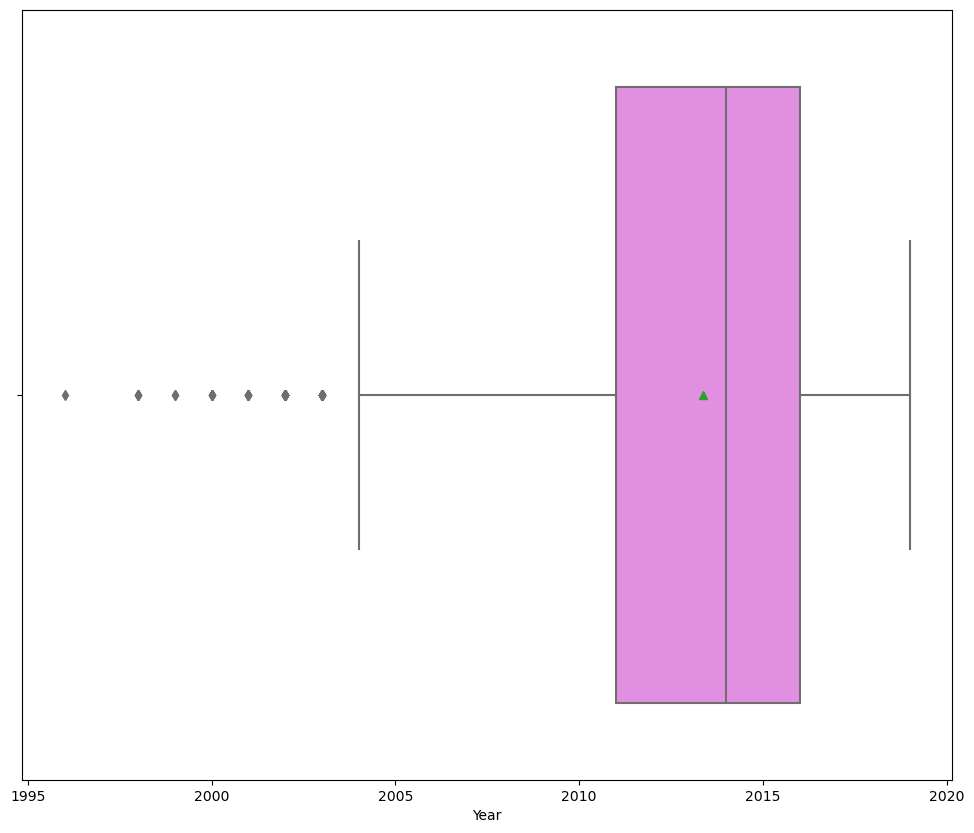

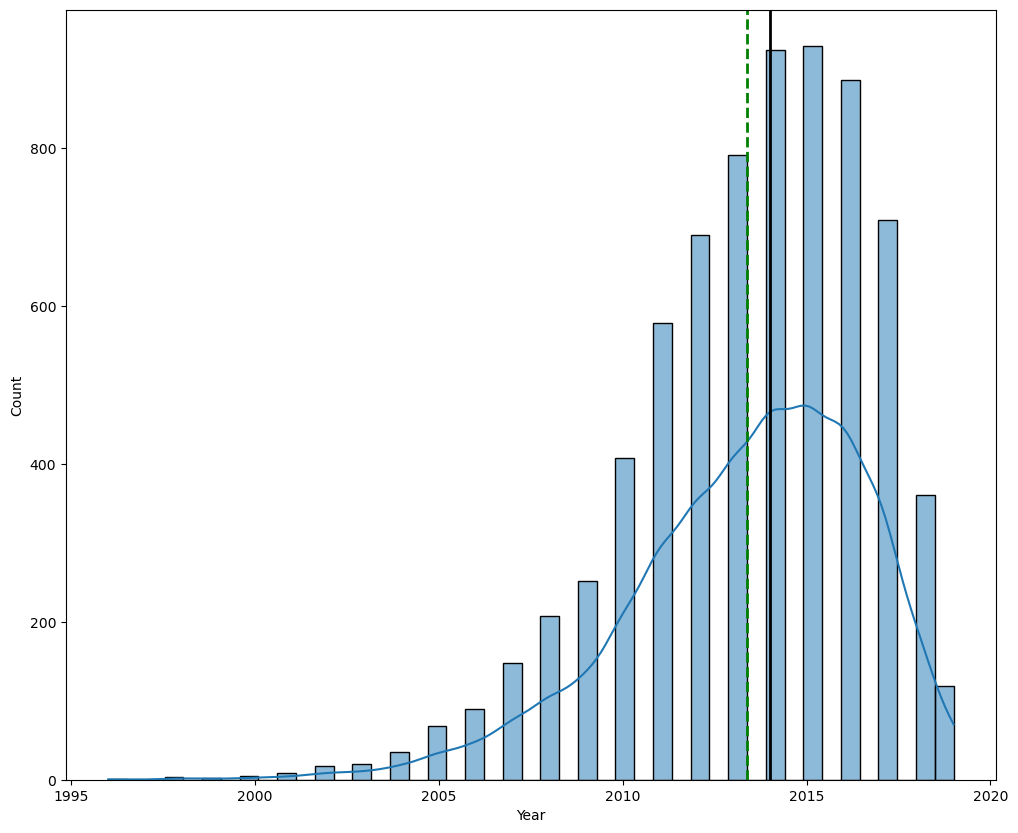

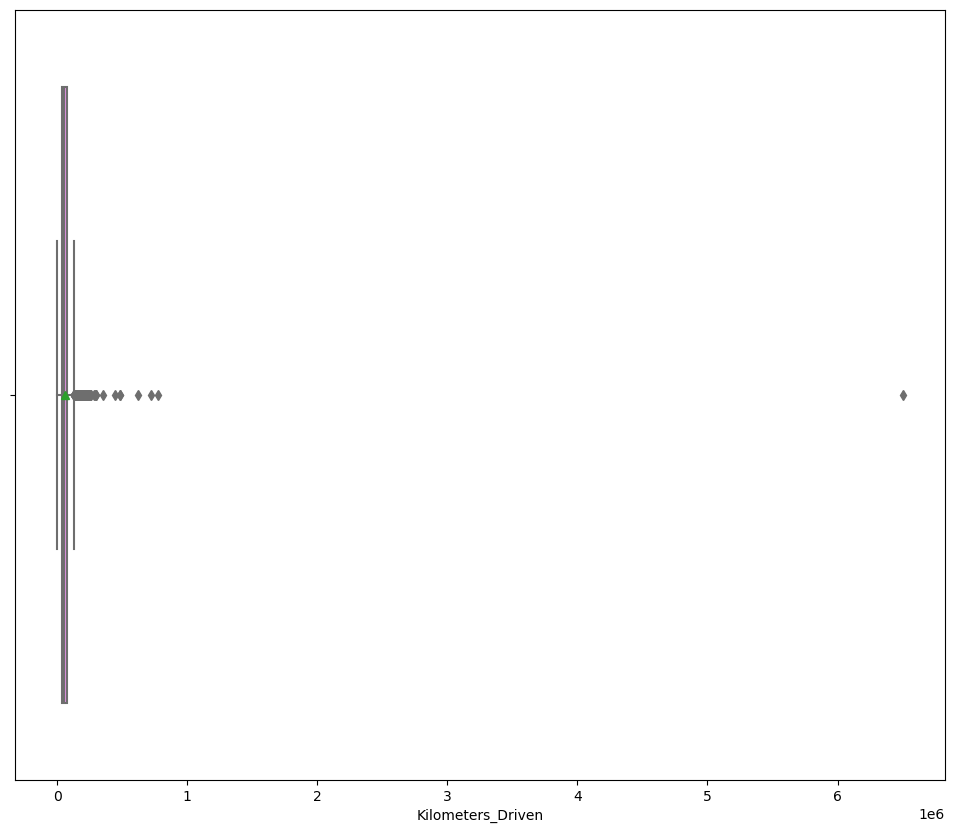

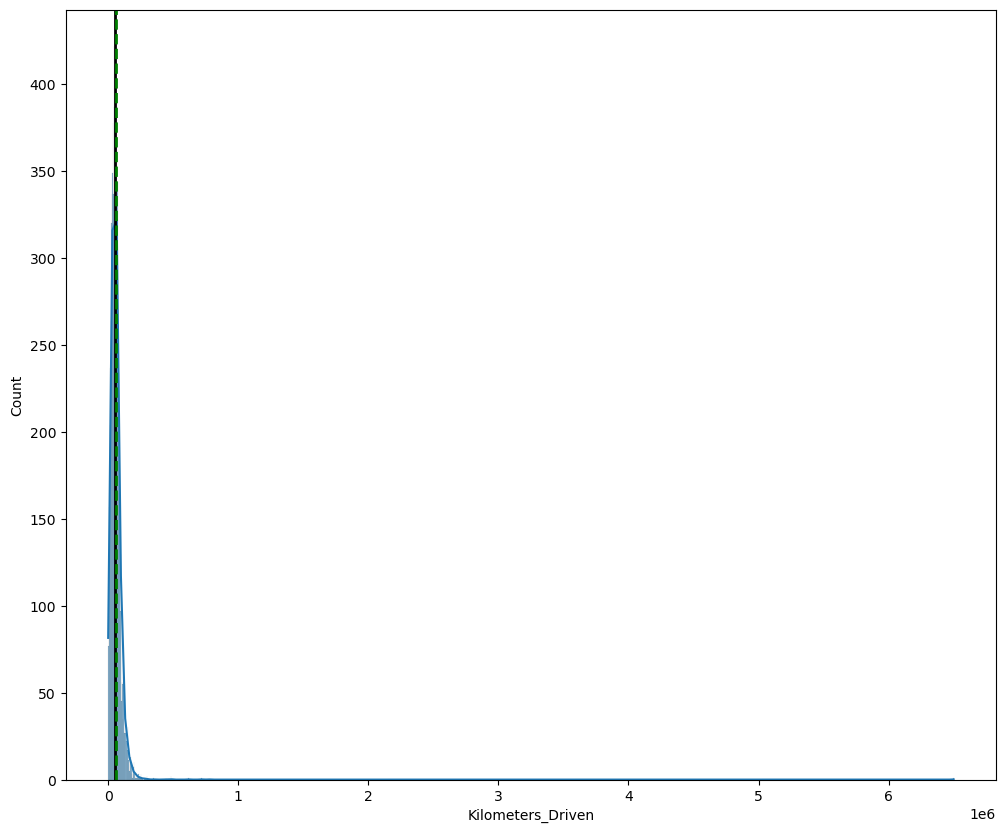

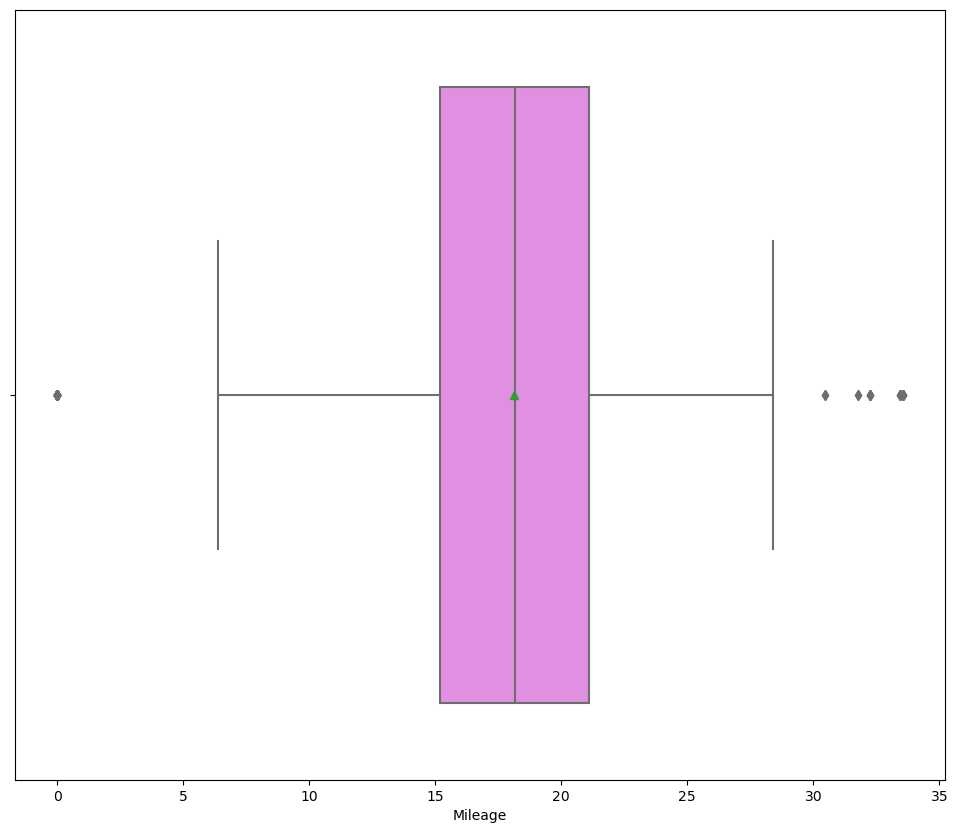

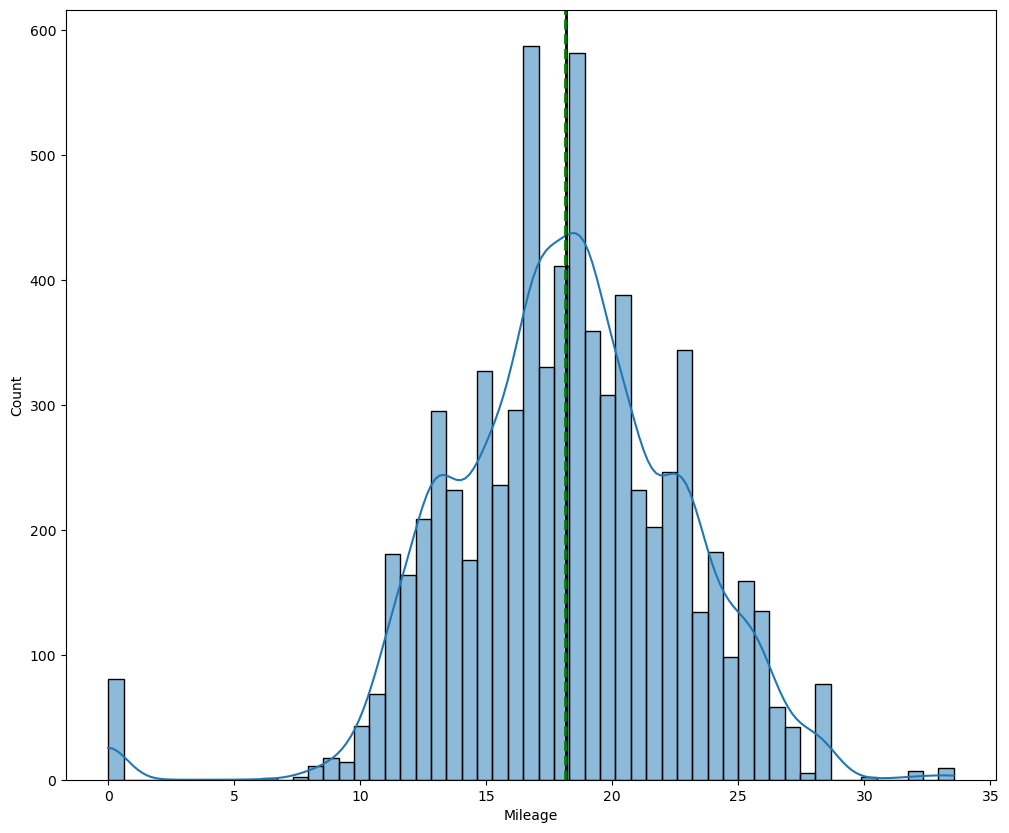

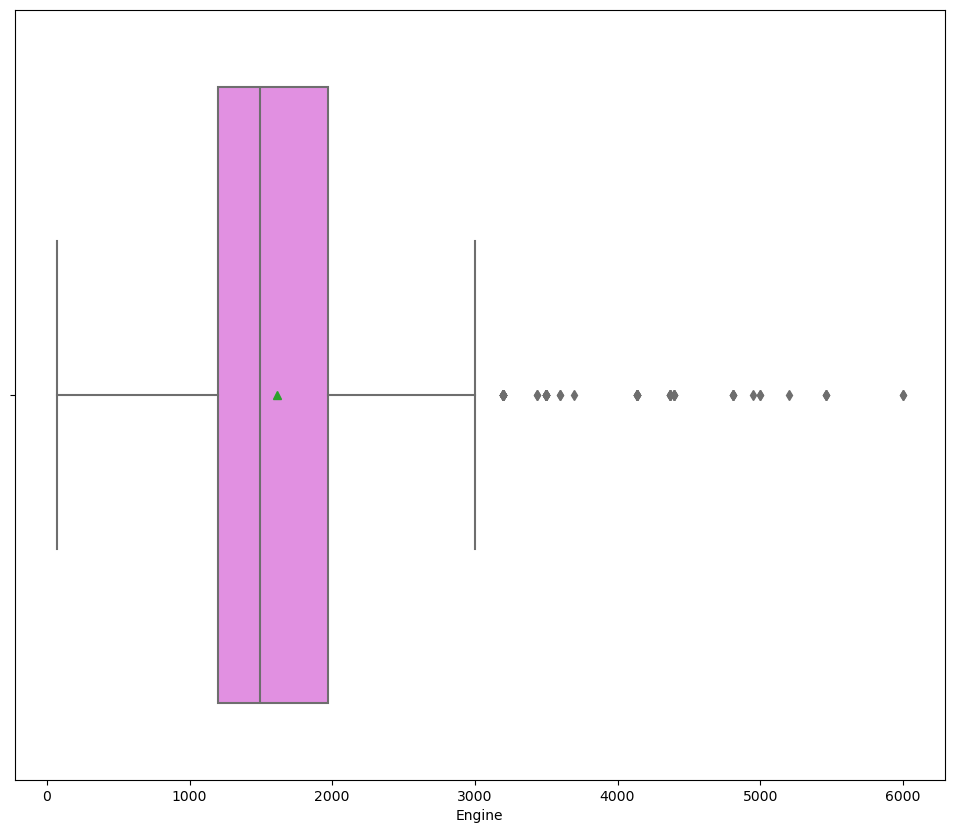

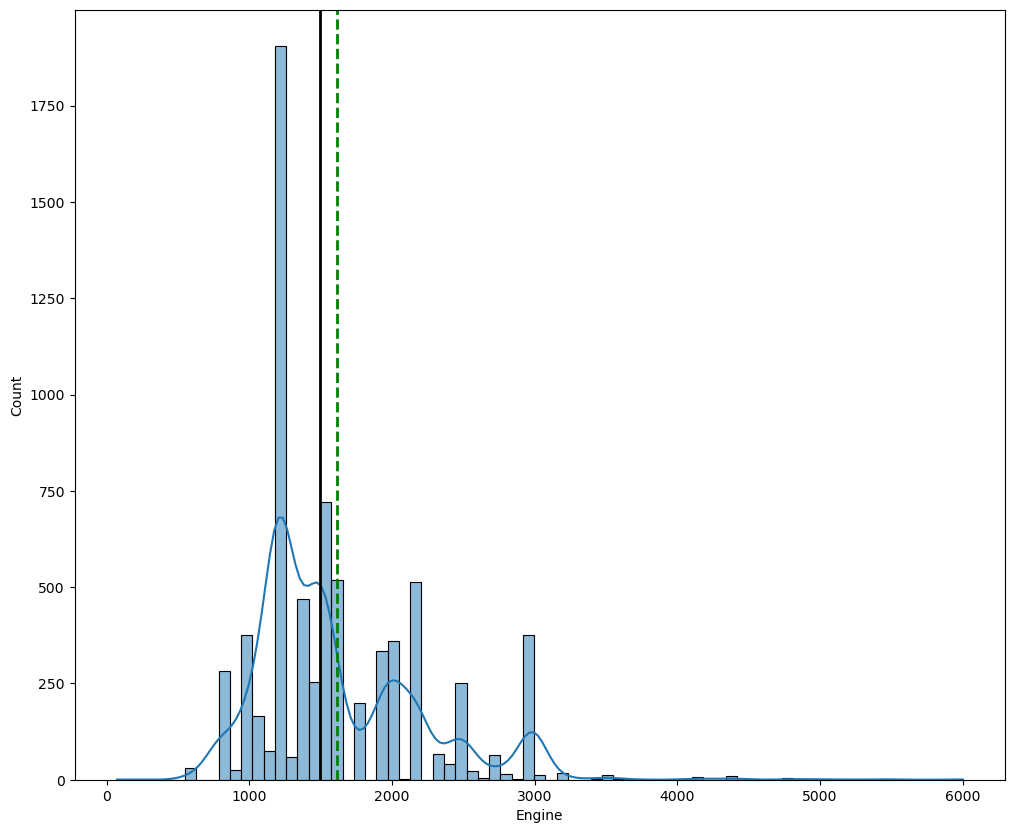

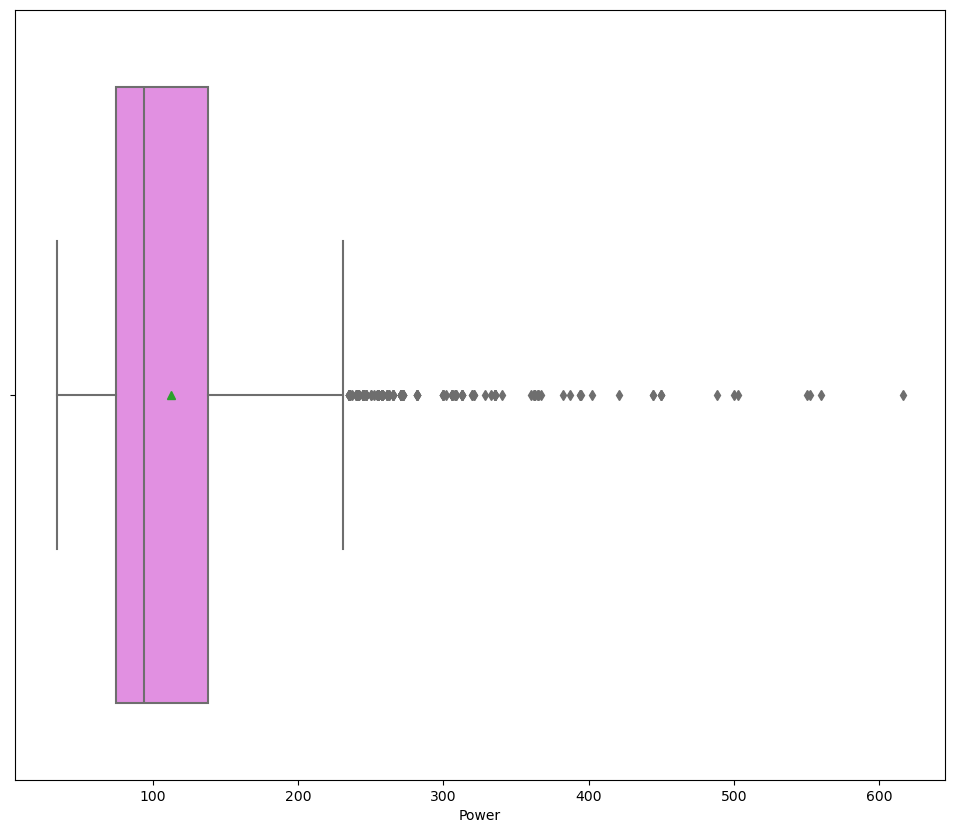

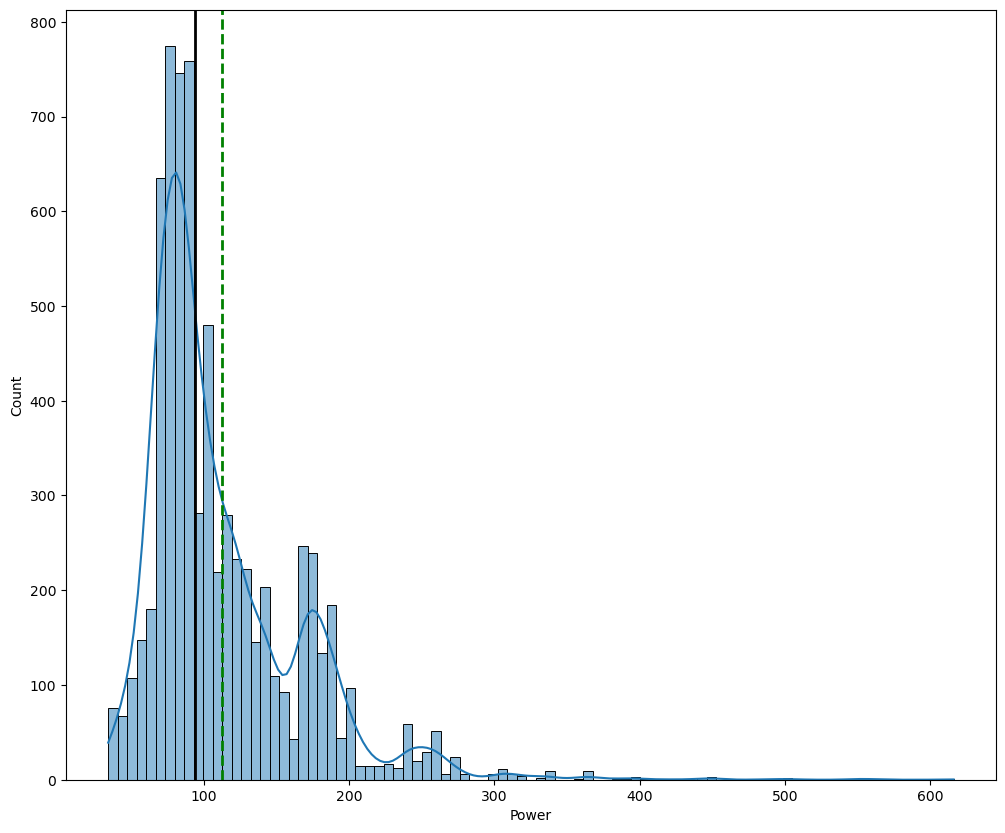

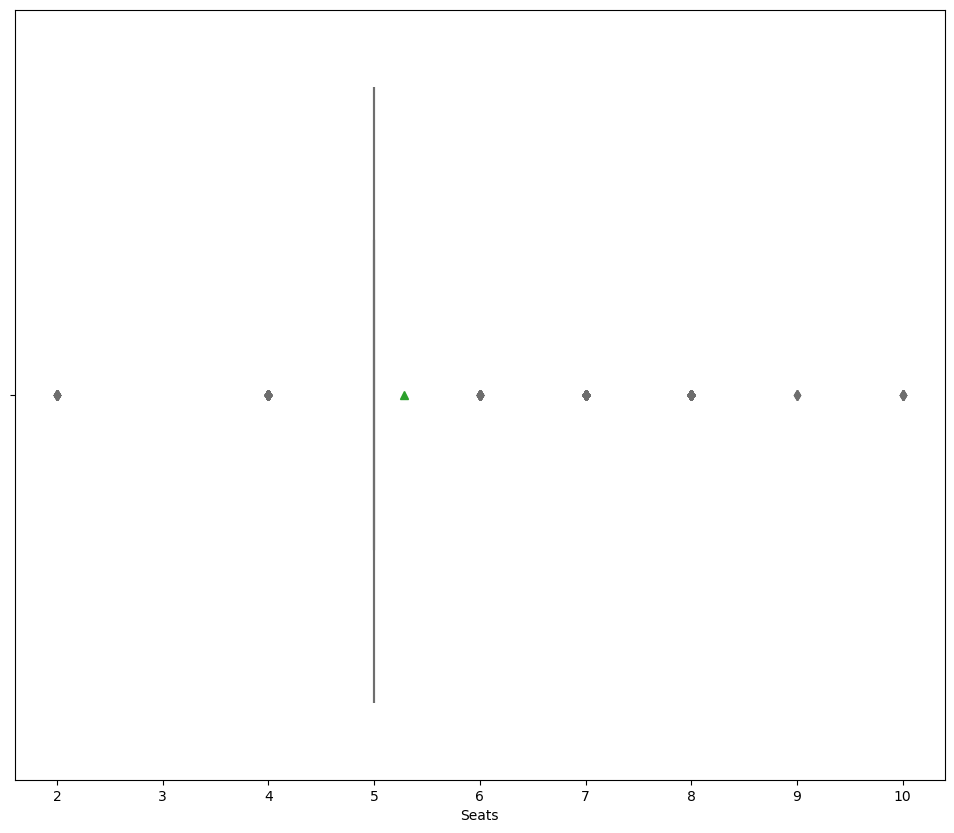

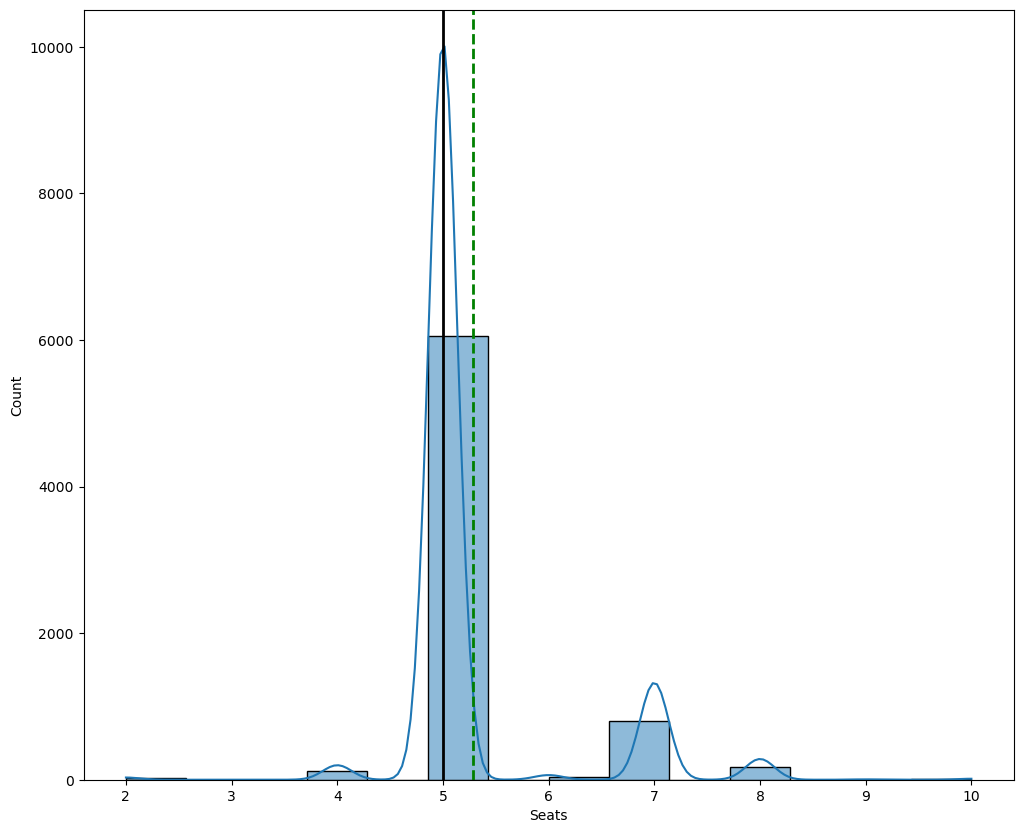

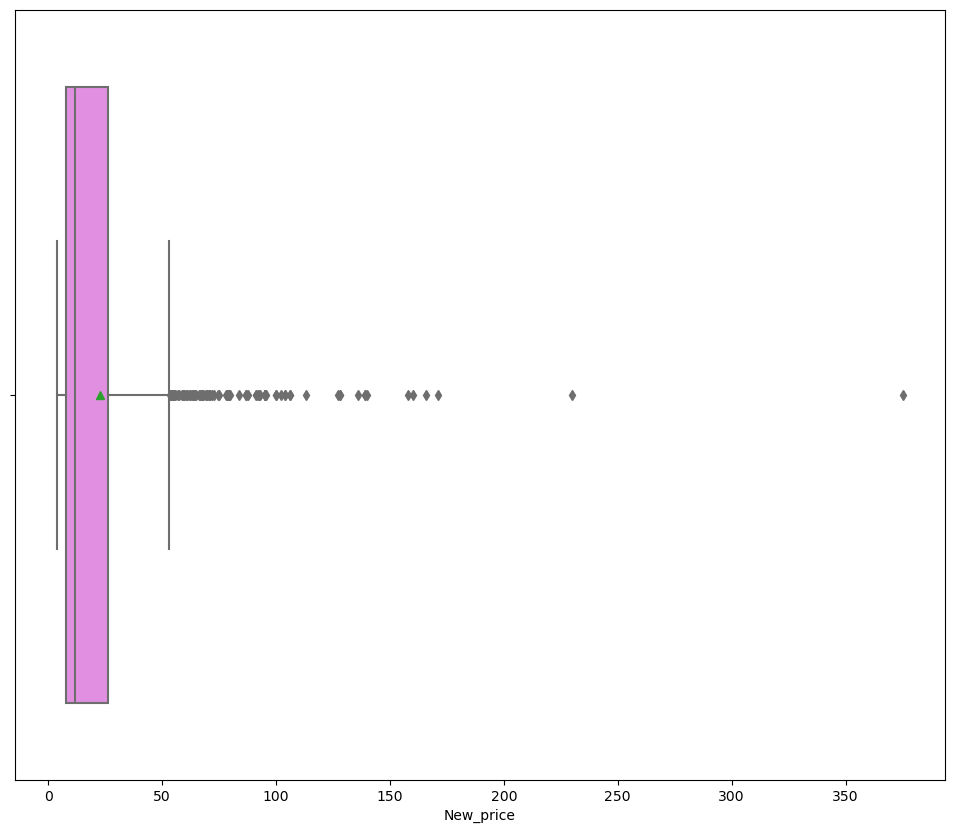

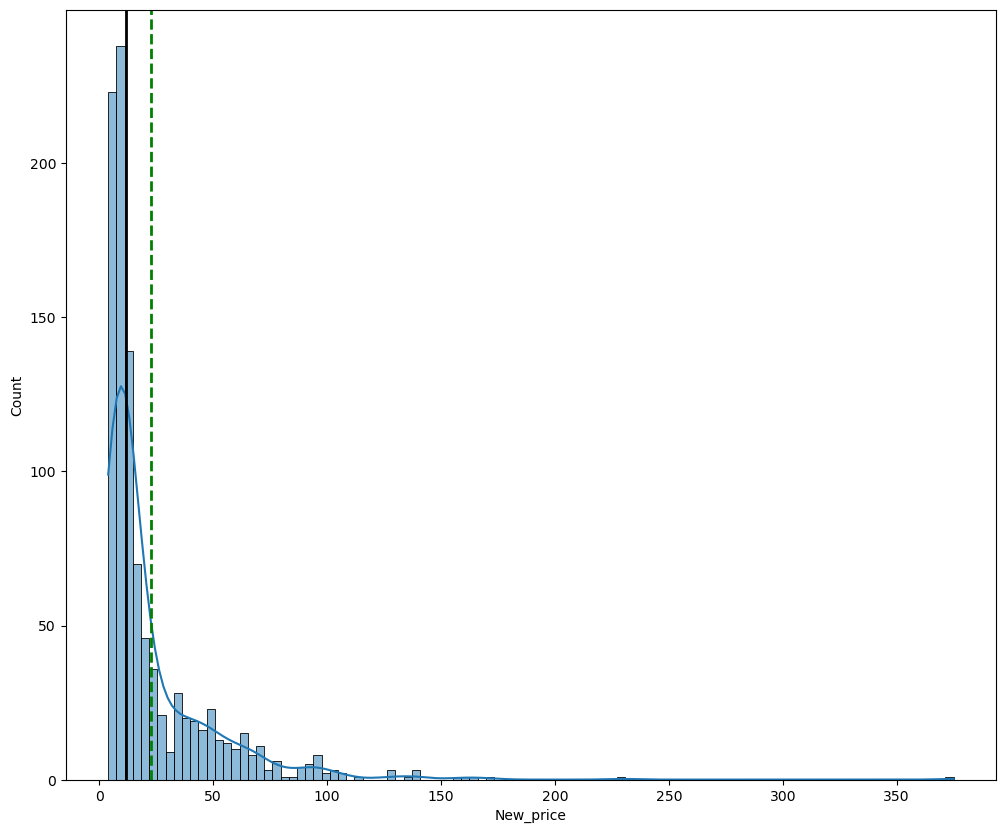

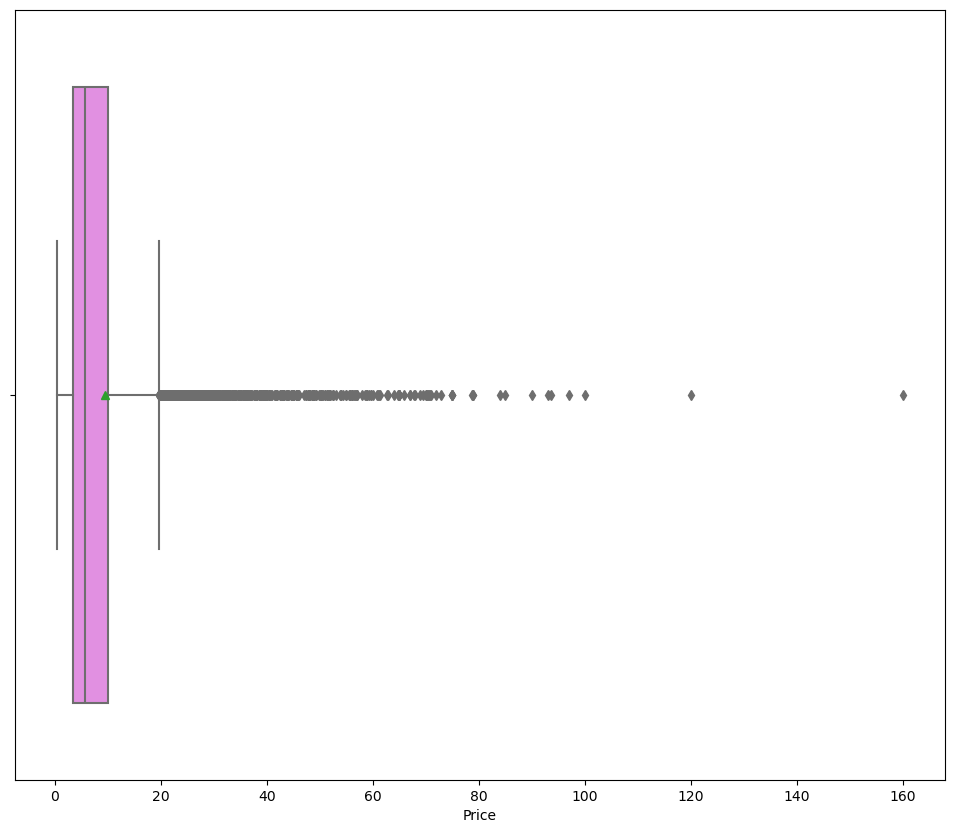

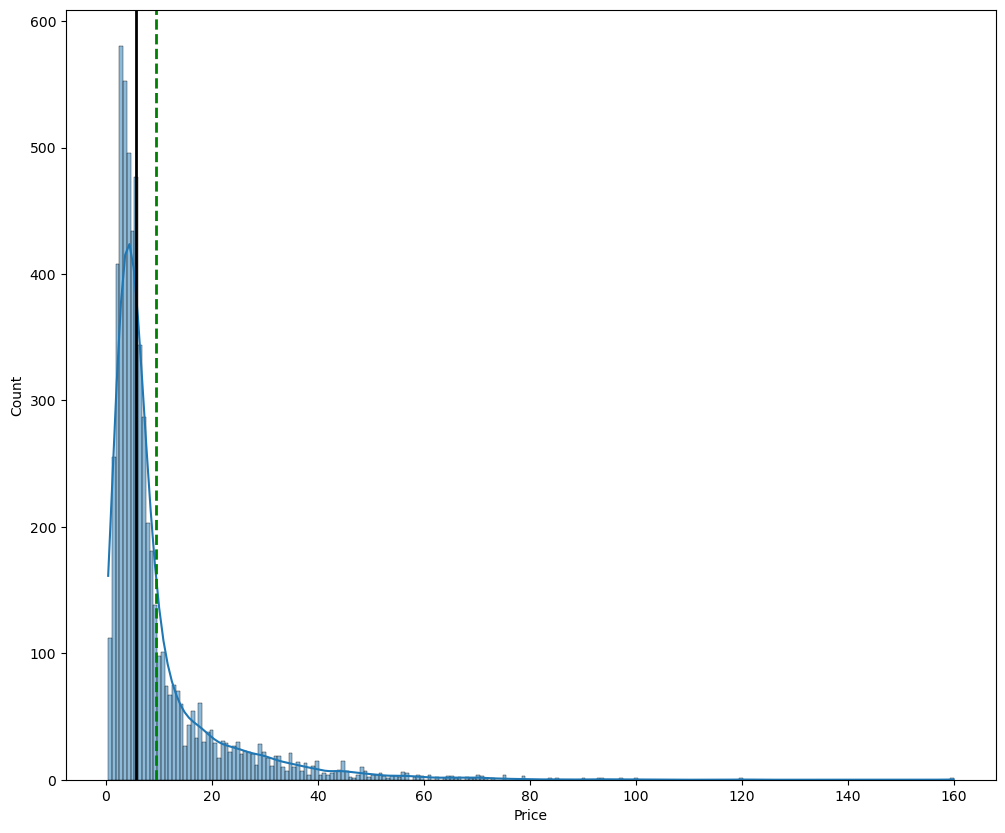

In [4]:
cols_number_list = data.select_dtypes(include = np.number).columns.tolist()

for column in cols_number_list:
    if (column=="S.No."):
        continue
    else:
        histogram_boxplot(data, column)

**Observations:**
* Year is left skewed.
* Kilometers_Driven is right skewed.
* Mileage is uniformly distributed.
* Engine is right skewed.
* Power is right skewed.
* Seats is uniformly distributed.
* New_price is right skewed.
* Price is right skewed.

In [5]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 20))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category
        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot
        ax.annotate(
                    label,
                    (x, y),
                    ha = "center",
                    va = "center",
                    size = 12,
                    xytext = (0, 5),
                    textcoords = "offset points",
                )  # Annotate the percentage
        
    plt.show()  # Show the plot

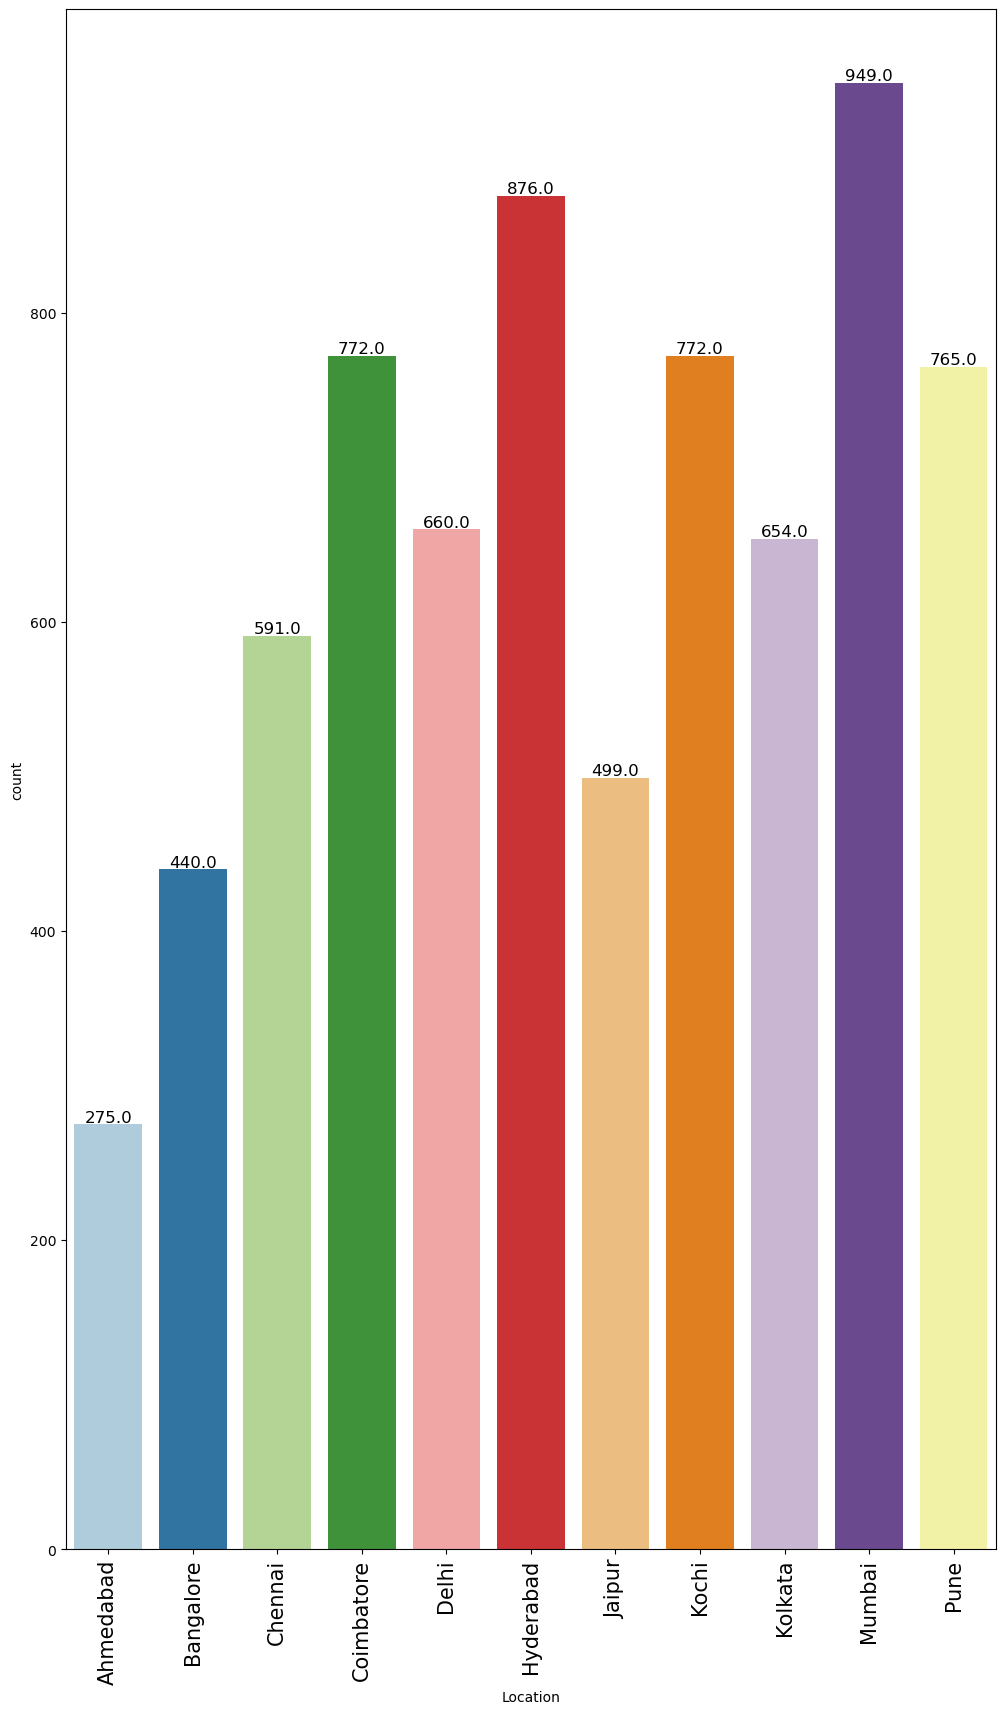

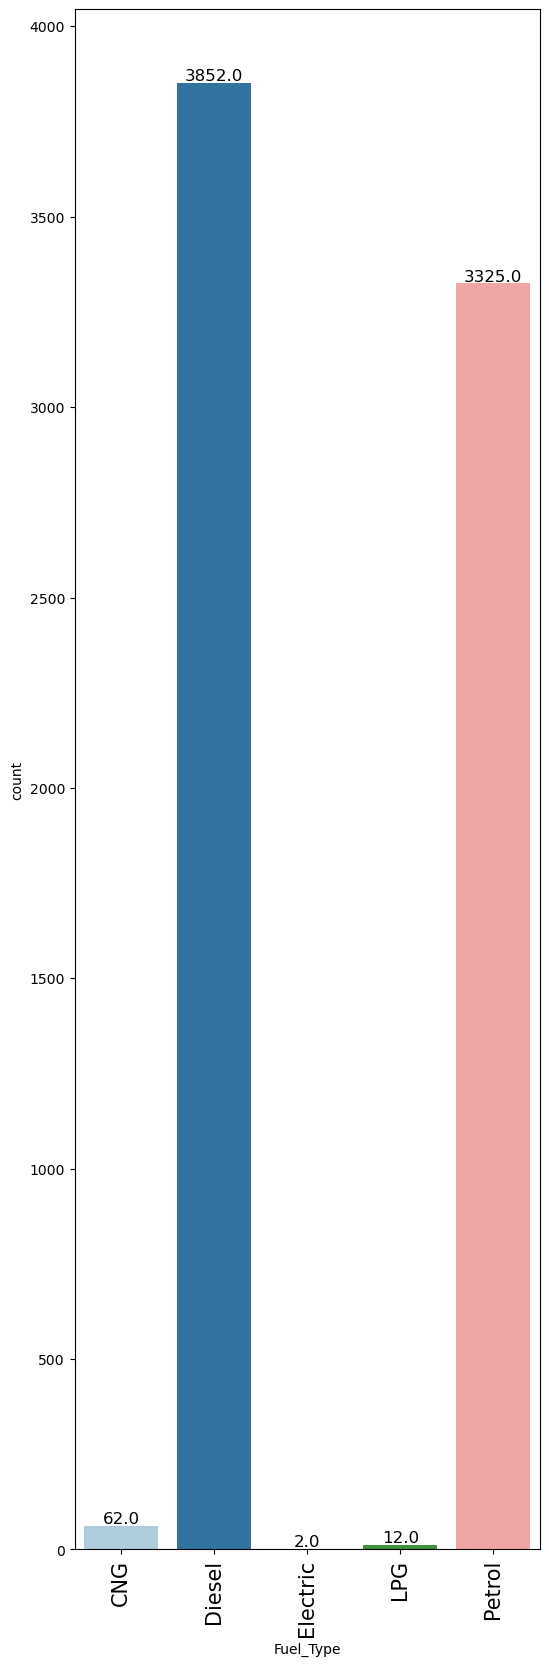

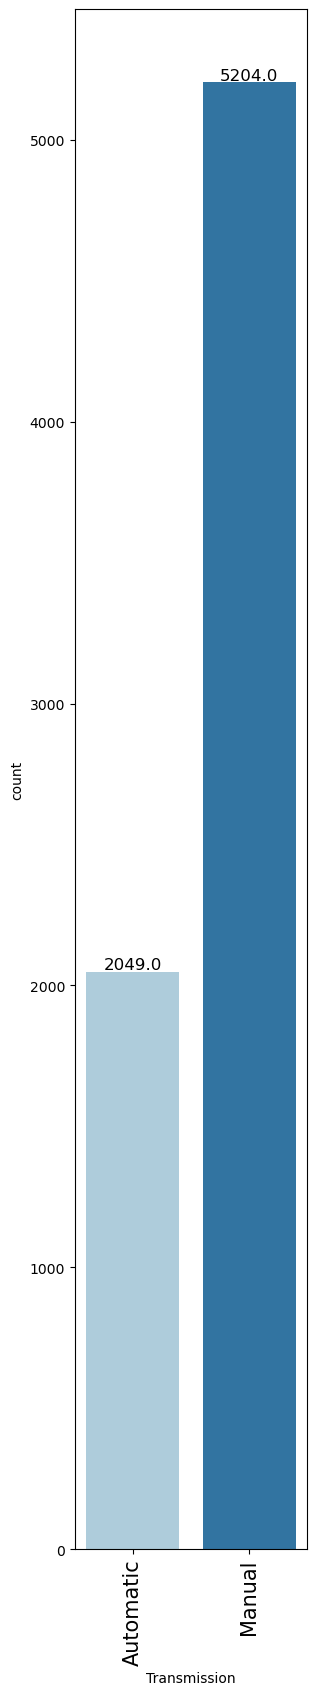

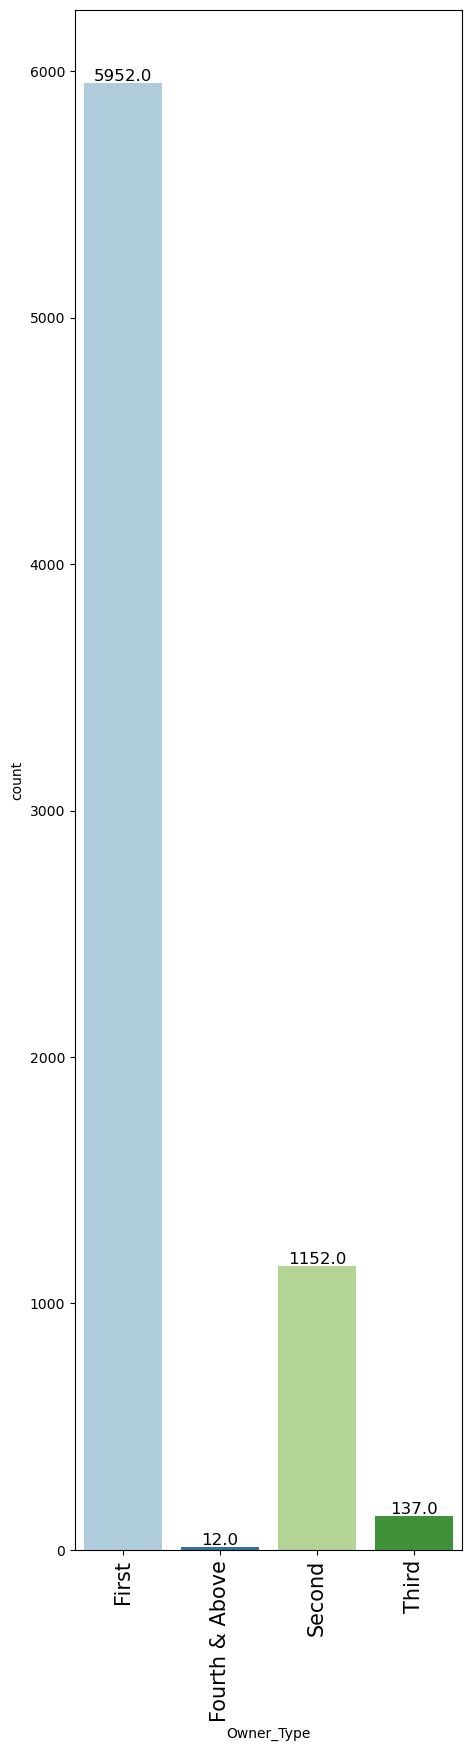

In [6]:
cols_categorical_list = data.select_dtypes(include='object').columns.tolist()

for column in cols_categorical_list:
    if (column == "Name"):
        continue
    labeled_barplot(data, column)

**Observations:**
* Mumbai has the highest frequency of used cars by 949 cars. Ahmedabad has the least frequency of used cars by 275.
* Diesel is the highest fuel type in used cars by 3852 cars. Electric is the least fuel type in used cars by 12 cars.
* Manual is the highest transmission type of used cars by 5204 cars. Automatic is the least transmission type of used cars by 2049 cars.
* First is the highest owner_type of used cars by 5952 cars. Fourth and above is the least owner_type of used cars by 12 cars.

In [7]:
df = data.copy()

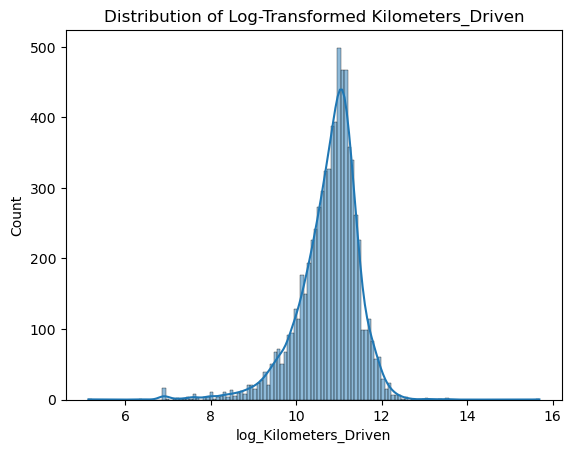

In [8]:
df['log_Kilometers_Driven'] = np.log(df['Kilometers_Driven'])

# Check the distribution of the transformed target variable
sns.histplot(df['log_Kilometers_Driven'], kde=True)
plt.title('Distribution of Log-Transformed Kilometers_Driven')
plt.show()

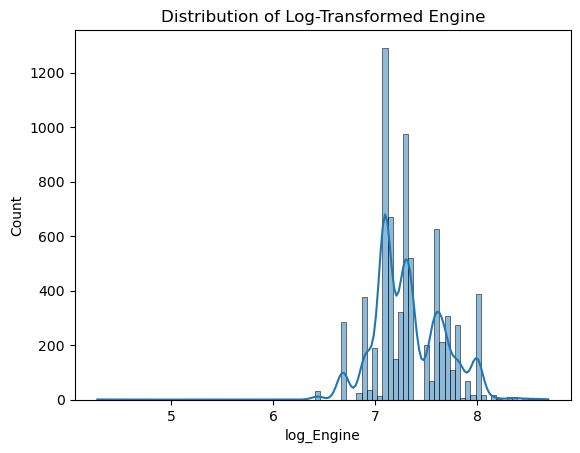

In [9]:
df['log_Engine'] = np.log(df['Engine'])

# Check the distribution of the transformed target variable
sns.histplot(df['log_Engine'], kde=True)
plt.title('Distribution of Log-Transformed Engine')
plt.show()

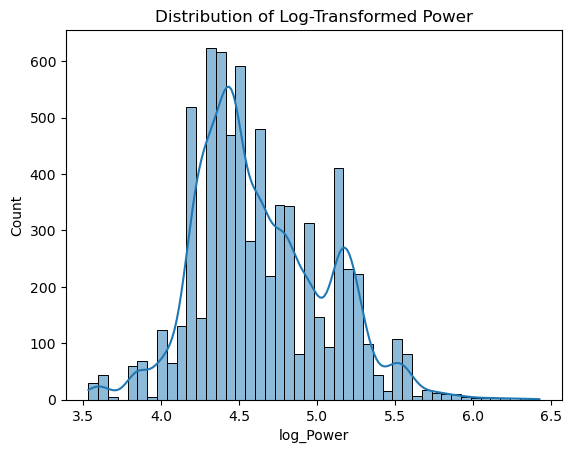

In [10]:
df['log_Power'] = np.log(df['Power'])

# Check the distribution of the transformed target variable
sns.histplot(df['log_Power'], kde=True)
plt.title('Distribution of Log-Transformed Power')
plt.show()

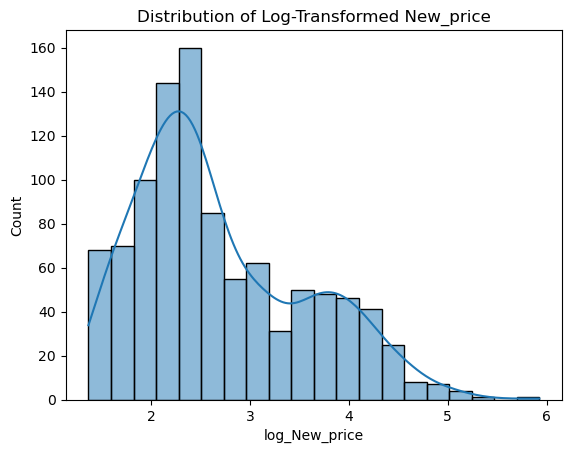

In [11]:
df['log_New_price'] = np.log(df['New_price'])

# Check the distribution of the transformed target variable
sns.histplot(df['log_New_price'], kde=True)
plt.title('Distribution of Log-Transformed New_price')
plt.show()

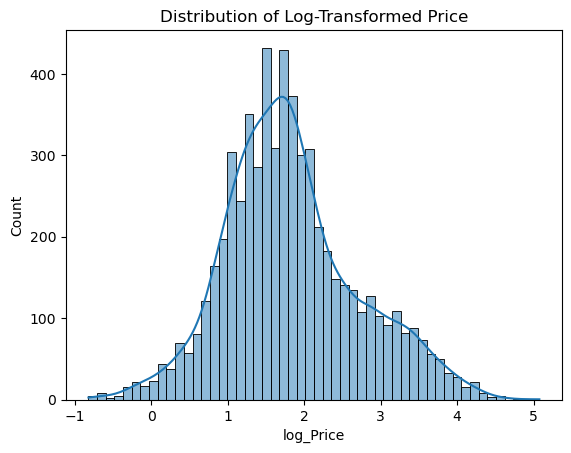

In [12]:
df['log_Price'] = np.log(df['Price'])

# Check the distribution of the transformed target variable
sns.histplot(df['log_Price'], kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.show()

**Observations:**
* log_Kilometer_Driven is uniformly distributed after transformation.
* log_Engine is right skewed even after transformation.
* log_Power is right skewed even after transformation.
* log_New_price is right skewed even after transformation.
* log_Price is almost uniformly distributed after transformation.

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

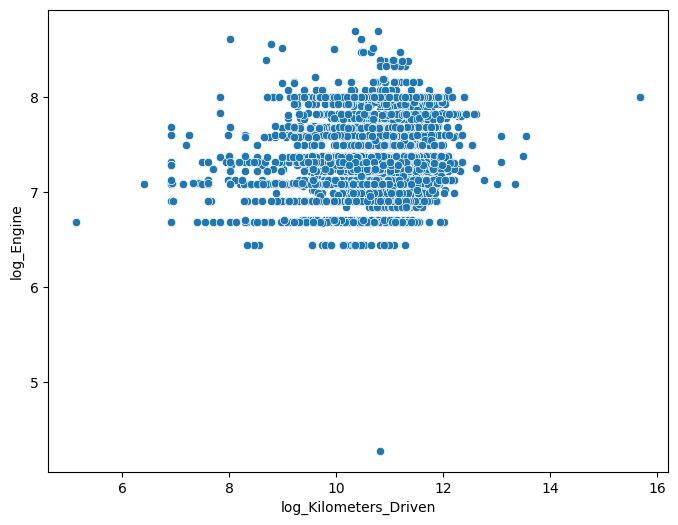

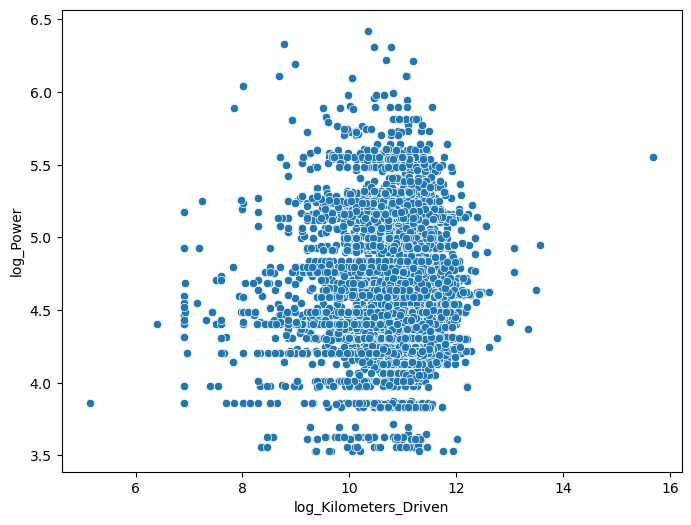

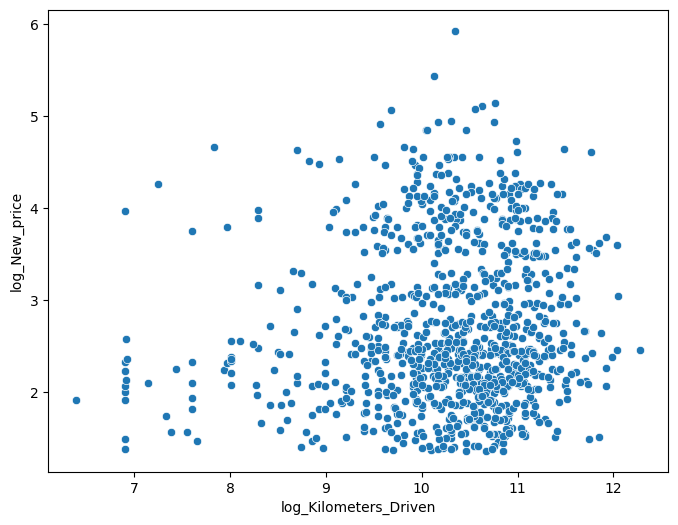

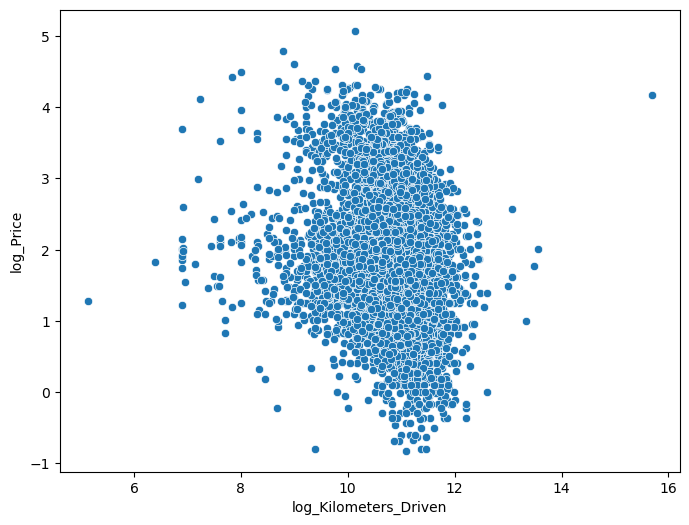

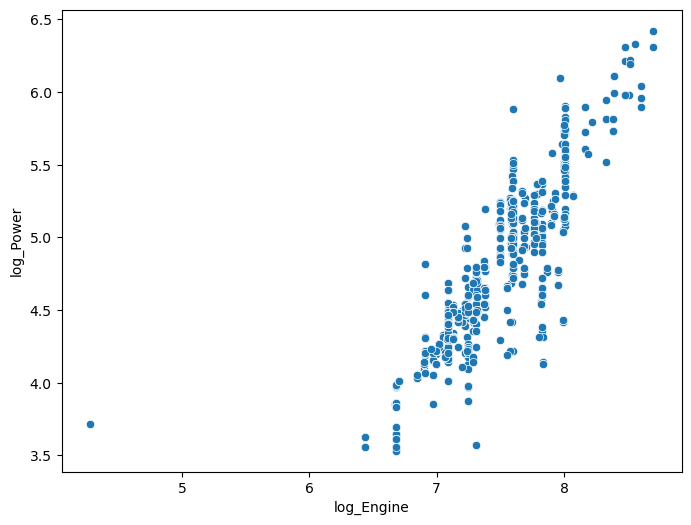

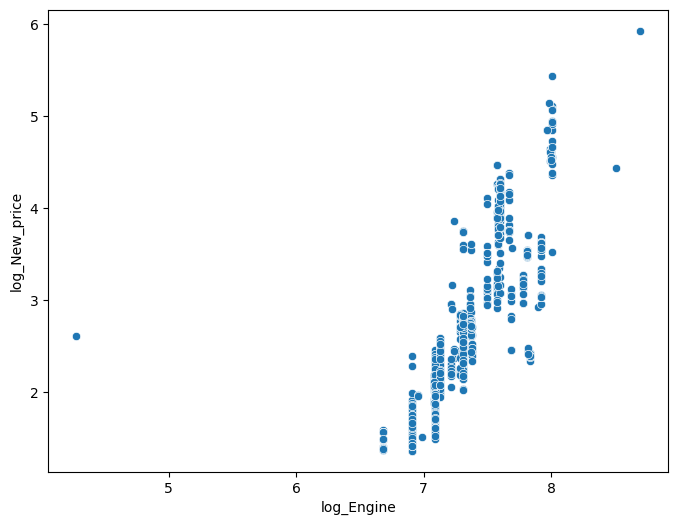

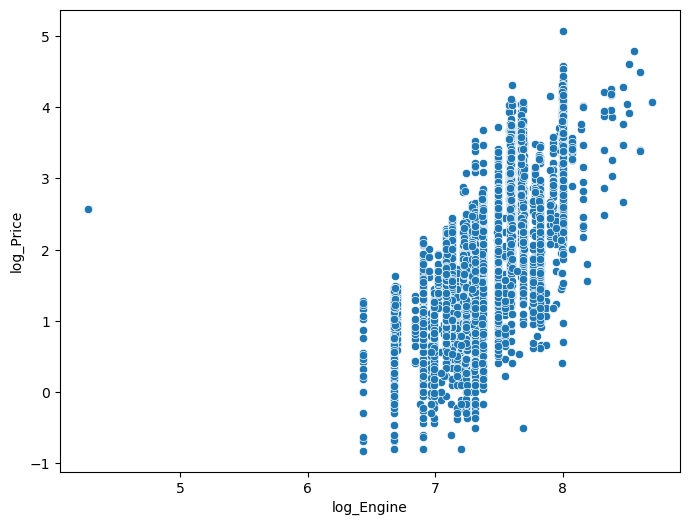

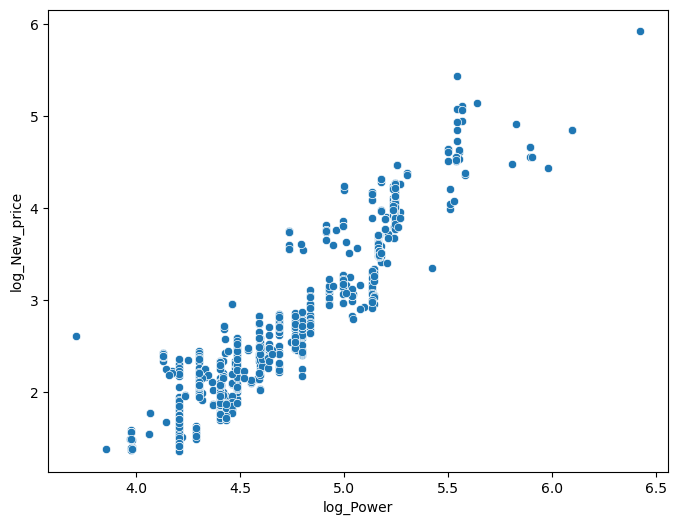

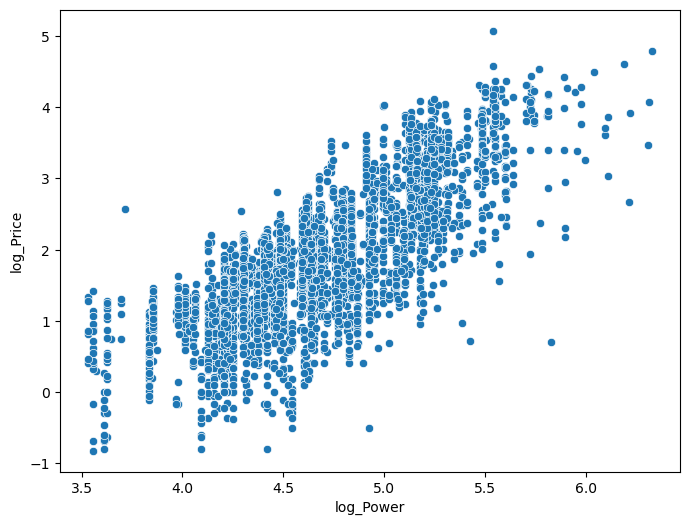

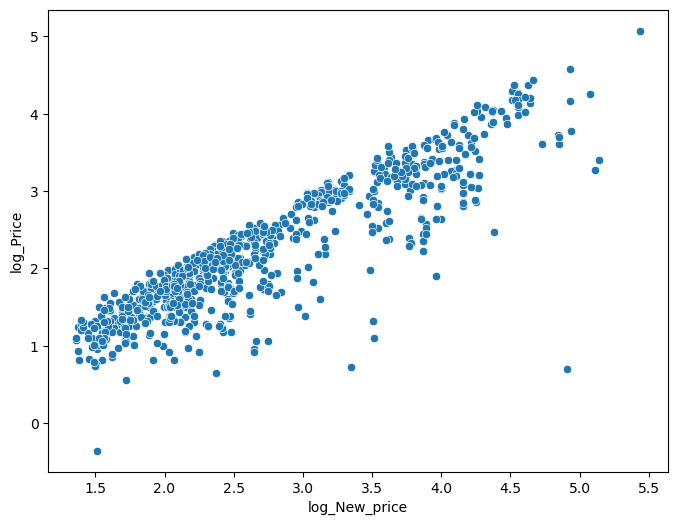

In [13]:
transformed_column_list = ['log_Kilometers_Driven', 'log_Engine', 'log_Power', 'log_New_price', 'log_Price']

for i in range(len(transformed_column_list)):
    for j in range(i+1, len(transformed_column_list)):
        plt.figure(figsize = [8, 6])
        sns.scatterplot(x = df[transformed_column_list[i]], y = df[transformed_column_list[j]])
        plt.show()

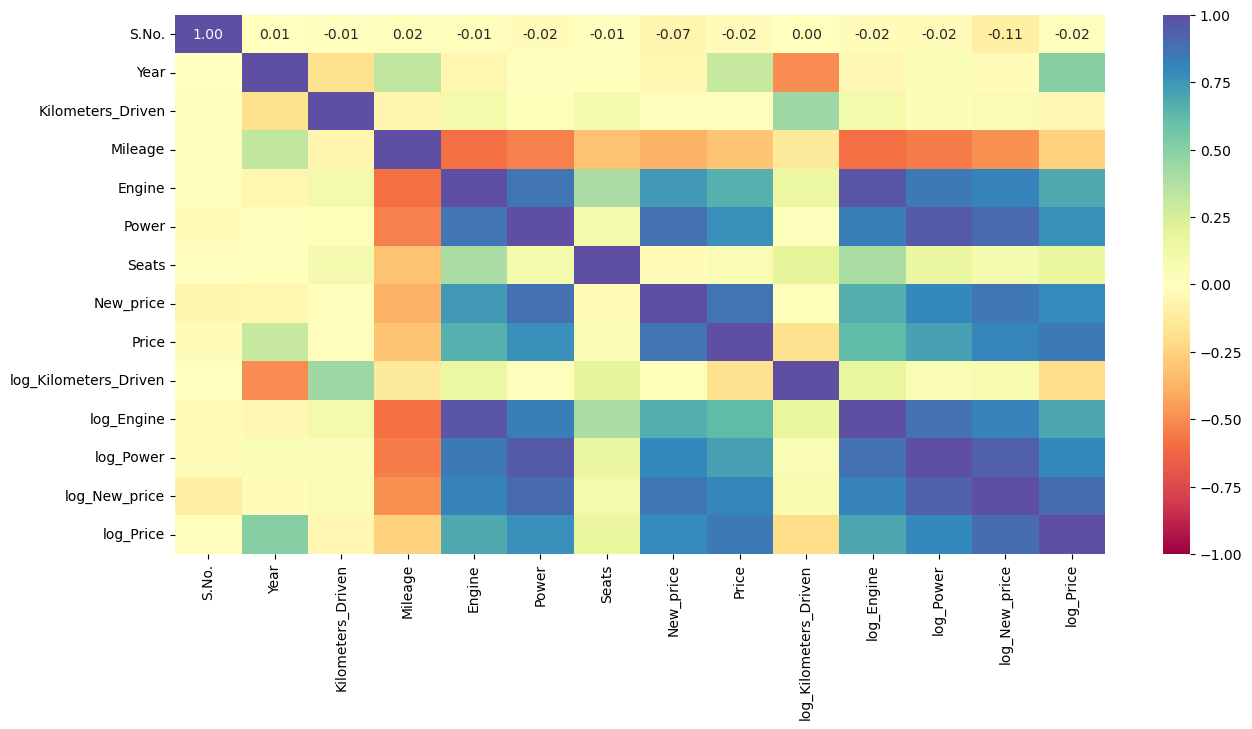

In [14]:
# Correlation check
cols_list = df.select_dtypes(include = np.number).columns.tolist()


plt.figure(figsize = (15, 7))

sns.heatmap(
    df[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

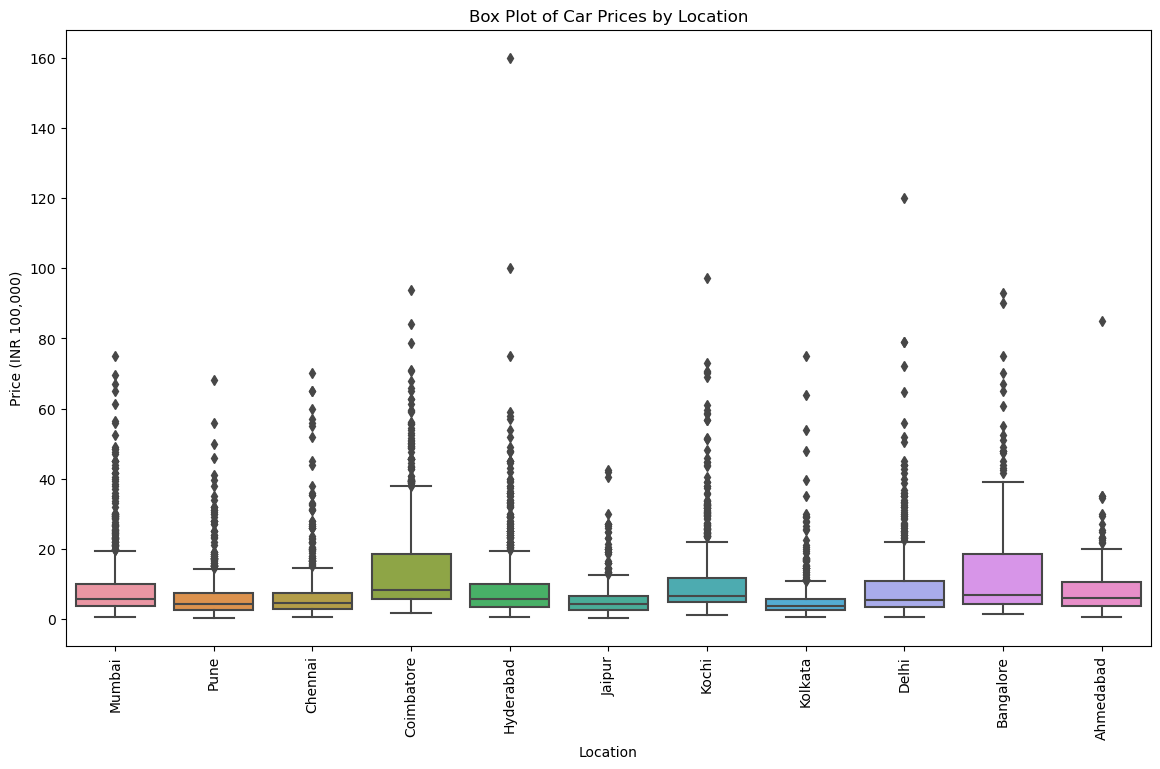

In [15]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['Location'], y=df['Price'], data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Car Prices by Location')
plt.xlabel('Location')
plt.ylabel('Price (INR 100,000)')
plt.show()

**Observations:**
* For log_Kilometers_Driven from 8 to 12, has majority of data points at log_Engine from 7 to 8.
* For log_Kilometers_Driven from 8 to 12, has majority of data points at log_Power from 3.5 to 6.5.
* log_Kilometers_Driven has no relation to log_New_price.
* log_Kilometer_Driven has some negative correlation with log_Price as majority of data is at log_Kilometers_Driven from 8 to 12 and ranging vertically for log_Price.
* Log_Engine and Log_Power are highly positively correlated.
* Log_Engine and Log_New_price are highly positively correlated.
* Log_Engine and Log_Price are highly positively correlated.
* Log_Power and Log_New_price are highly positively correlated.
* Log_Power and Log_Price are highly positively correlated.
* Log_Price and Log_New_price are highly positively correlated.
* The Heatmap shows the positive, negative, and nutral correlations between all the features in the dataset.
* The Box plot of location and the prices of cars there shows that there are several outliers for each location with Mumbai having the highest outliers and Ahmedabad having the least.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [16]:
df[['Brand', 'Model_name']] = df['Name'].str.split(n=1, expand=True)

In [17]:
for index, row in df.iterrows():
    if row['Brand'] == 'Land':
        # Update the 'Brand' column
        df.at[index, 'Brand'] = 'Land-Rover'

        # Remove the first word from 'Model_name'
        df.at[index, 'Model_name'] = ' '.join(row['Model_name'].split()[1:])

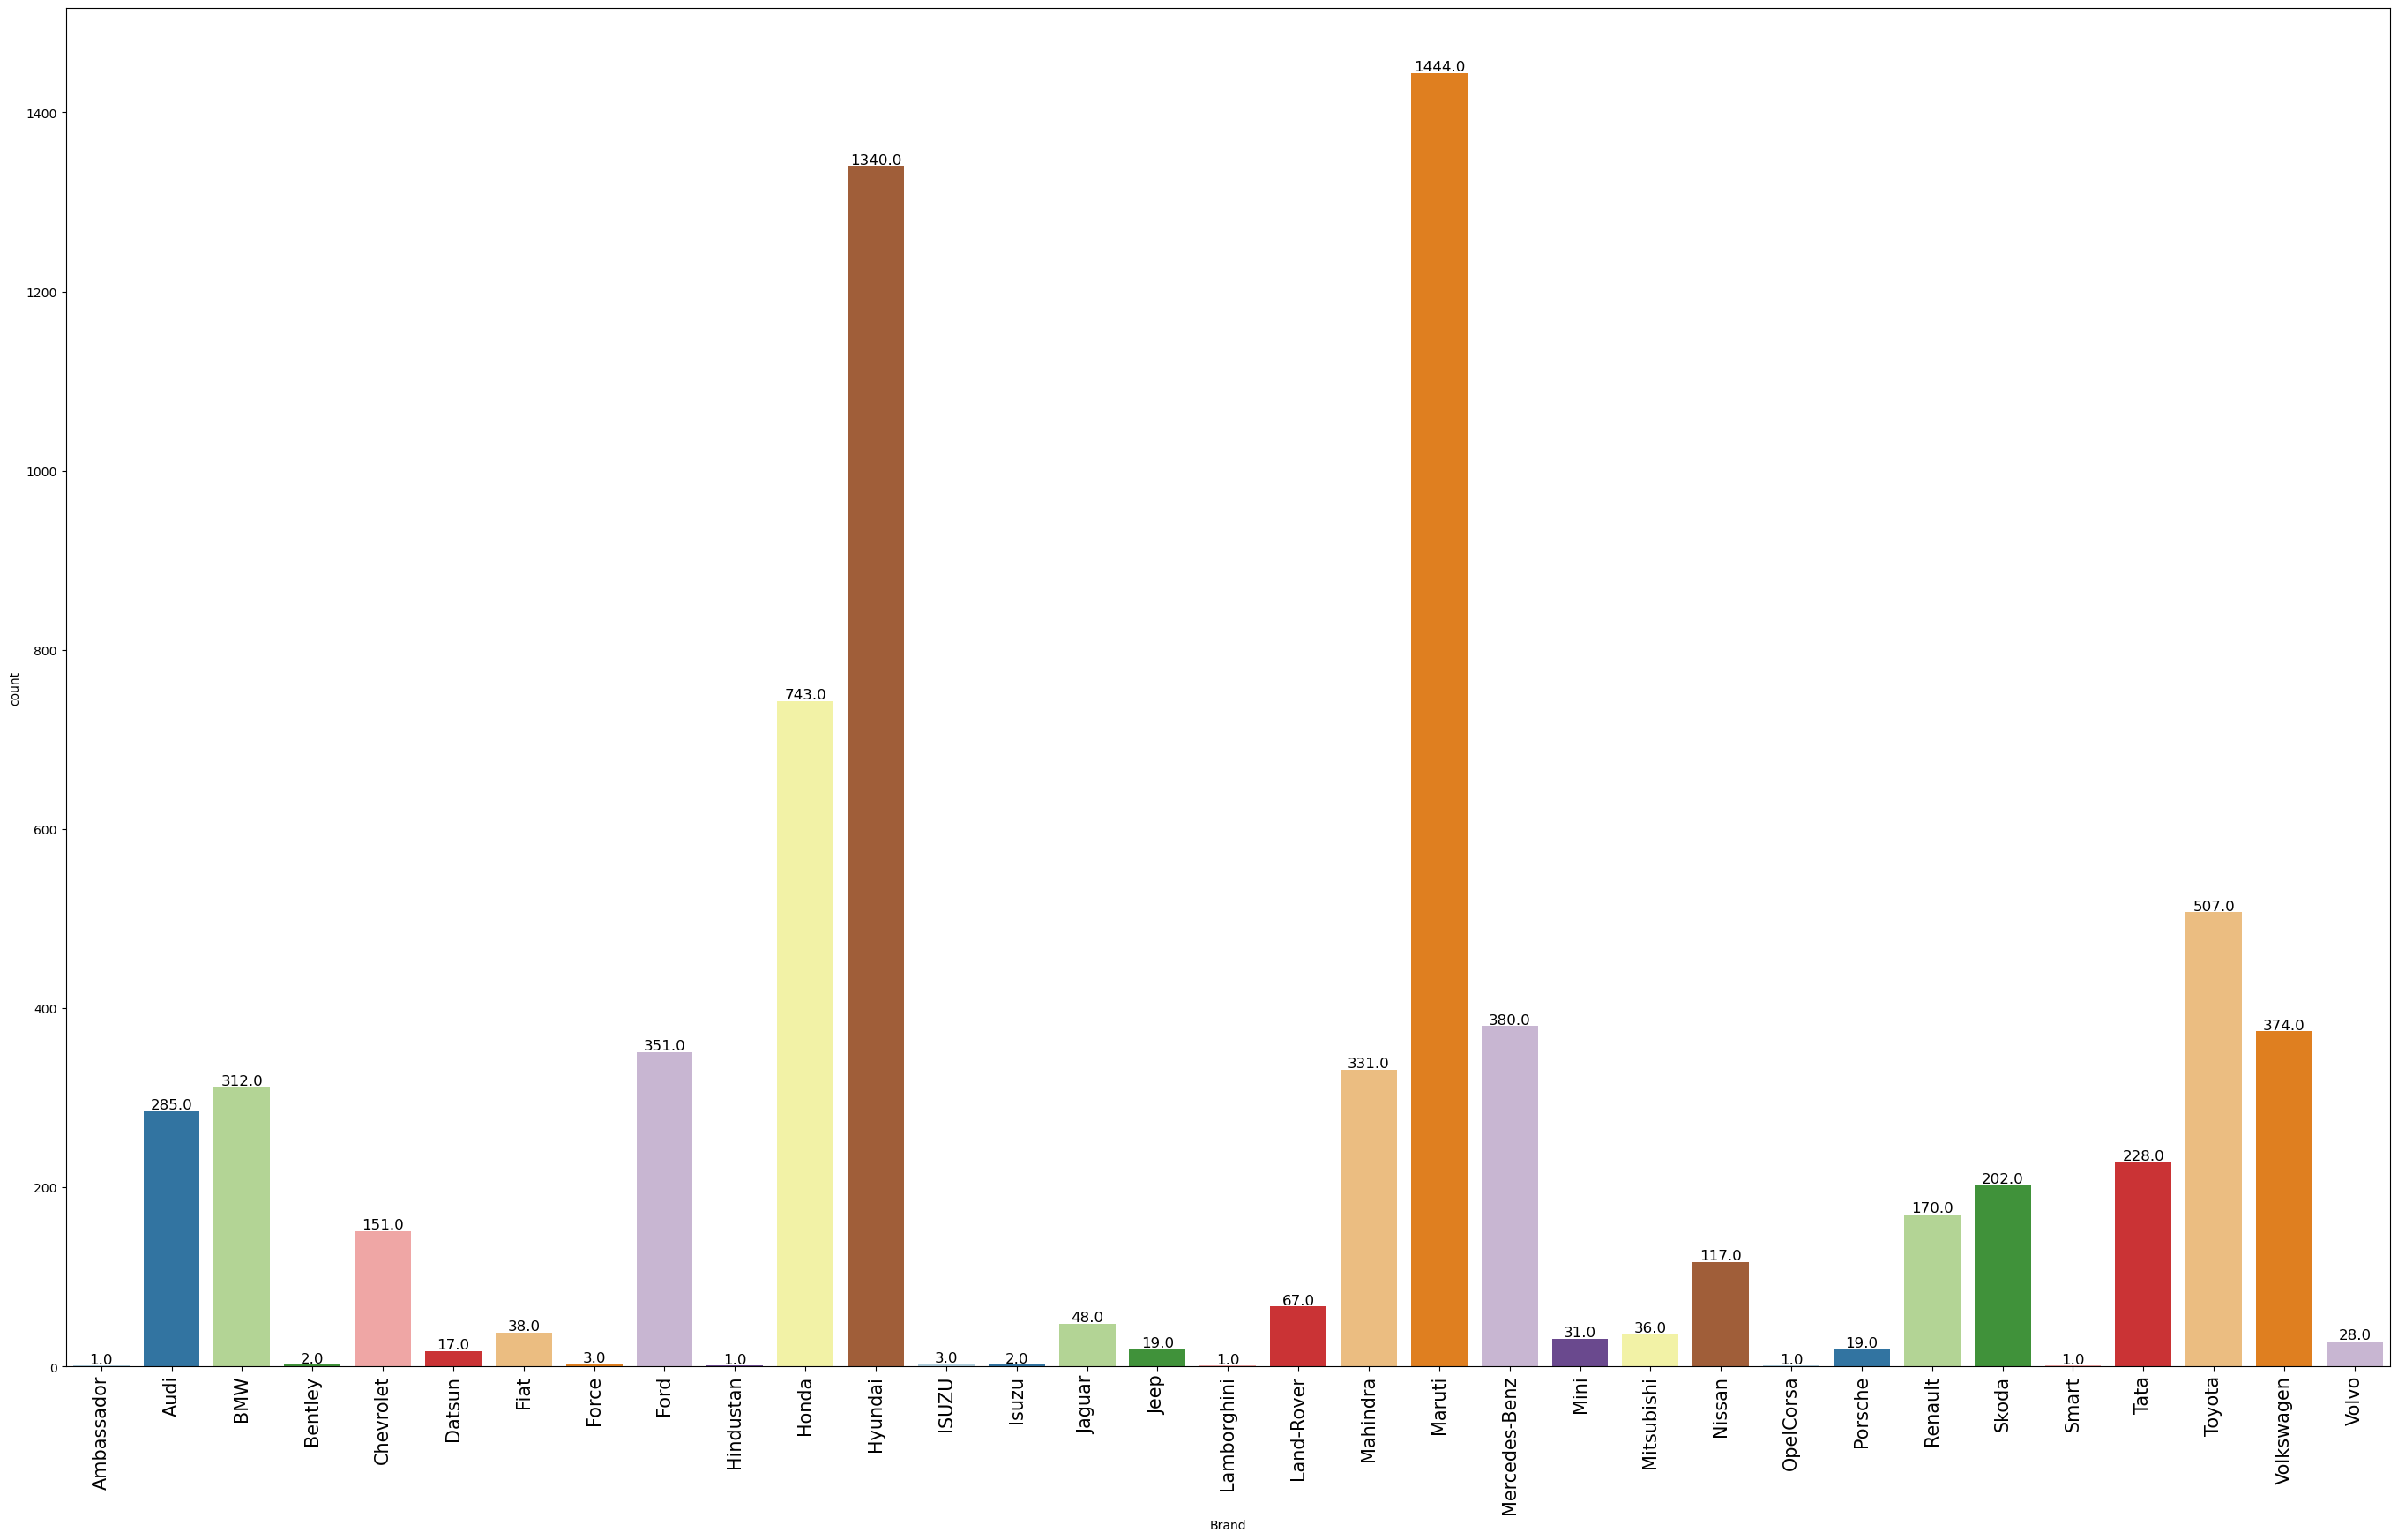

In [18]:
labeled_barplot(df, 'Brand')

**Observations:**
* The barplot above shows the frequency of used cars by brands. Maruti has the highest frequency of used cars by 1444 cars and Hindustan, Lamborghini, OpelCorsa, and Smart has the least frequency of used cars by 1 car.

### **Missing value treatment**

In [19]:
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6247
Price                    1234
log_Kilometers_Driven       0
log_Engine                 46
log_Power                 175
log_New_price            6247
log_Price                1234
Brand                       0
Model_name                  0
dtype: int64

In [20]:
median_seats = df.groupby(['Brand', 'Model_name'])['Seats'].median()
median_seats_by_brand = df.groupby('Brand')['Seats'].median()
total_median_seats = df['Seats'].median()
    
def get_median_seats(row):
    return median_seats.loc[row['Brand'], row['Model_name']]

def get_median_seats_by_brand(row):
    return median_seats_by_brand.loc[row['Brand']]

df['Seats'] = df['Seats'].fillna(df.apply(get_median_seats, axis=1))

if df['Seats'].isnull().sum() > 0:
    df['Seats'] = df['Seats'].fillna(df.apply(get_median_seats_by_brand, axis=1))

if df['Seats'].isnull().sum() > 0:
    df['Seats'].fillna(total_median_seats, inplace=True)

print(df['Seats'].isnull().sum())

0


In [21]:
median_engine = df.groupby(['Brand', 'Model_name'])['Engine'].median()
median_engine_by_brand = df.groupby('Brand')['Engine'].median()
total_median_engine = df['Engine'].median()
    
def get_median_engine(row):
    return median_engine.loc[row['Brand'], row['Model_name']]

def get_median_engine_by_brand(row):
    return median_engine_by_brand.loc[row['Brand']]

df['Engine'] = df['Engine'].fillna(df.apply(get_median_engine, axis=1))

if df['Engine'].isnull().sum() > 0:
    df['Engine'].fillna(df.apply(get_median_engine_by_brand, axis=1))

if df['Engine'].isnull().sum() > 0:
    df['Engine'].fillna(total_median_engine, inplace=True)

print(df['Engine'].isnull().sum())

0


In [22]:
median_power = df.groupby(['Brand', 'Model_name'])['Power'].median()
median_power_by_brand = df.groupby('Brand')['Power'].median()
total_median_power = df['Power'].median()
    
def get_median_power(row):
    return median_power.loc[row['Brand'], row['Model_name']]

def get_median_power_by_brand(row):
    return median_power_by_brand.loc[row['Brand']]

df['Power'] = df['Power'].fillna(df.apply(get_median_power, axis=1))

if df['Power'].isnull().sum() > 0:
    df['Power'].fillna(df.apply(get_median_power_by_brand, axis=1))

if df['Power'].isnull().sum() > 0:
    df['Power'].fillna(total_median_power, inplace=True)

print(df['Power'].isnull().sum())

0


In [23]:
median_new_prices = df.groupby(['Brand', 'Model_name'])['New_price'].median()
median_new_price_by_brand = df.groupby('Brand')['New_price'].median()
total_median_new_price = df['New_price'].median()

def get_median_new_price(row):
    return median_new_prices.loc[row['Brand'], row['Model_name']]

def get_median_new_price_by_brand(row):
    return median_new_price_by_brand.loc[row['Brand']]

df['New_price'] = df['New_price'].fillna(df.apply(get_median_new_price, axis=1))

if df['New_price'].isnull().sum() > 0:
    df['New_price'].fillna(df.apply(get_median_new_price_by_brand, axis=1))

if df['New_price'].isnull().sum() > 0:
    df['New_price'].fillna(total_median_new_price, inplace=True)

print(df['New_price'].isnull().sum())

0


In [24]:
df = df.dropna(subset=['Price'])

In [25]:
median_mileage = df.groupby(['Brand', 'Model_name'])['Mileage'].median()
median_mileage_by_brand = df.groupby('Brand')['Mileage'].median()
total_median_mileage = df['Mileage'].median()

def get_median_mileage(row):
    return median_mileage.loc[row['Brand'], row['Model_name']]

def get_median_mileage_by_brand(row):
    return median_mileage_by_brand.loc[row['Brand']]

df['Mileage'] = df['Mileage'].fillna(df.apply(get_median_mileage, axis=1))

if df['Mileage'].isnull().sum() > 0:
    df['Mileage'].fillna(df.apply(get_median_mileage_by_brand, axis=1))

if df['Mileage'].isnull().sum() > 0:
    df['Mileage'].fillna(total_median_mileage, inplace=True)

print(df['Mileage'].isnull().sum())

0


In [26]:
median_log_Engine = df.groupby(['Brand', 'Model_name'])['log_Engine'].median()
median_log_engine_by_brand = df.groupby('Brand')['log_Engine'].median()
total_median_log_engine = df['log_Engine'].median()
    
def get_median_log_Engine(row):
    return median_log_Engine.loc[row['Brand'], row['Model_name']]

def get_median_log_engine_by_brand(row):
    return median_log_engine_by_brand.loc[row['Brand']]

df['log_Engine'] = df['log_Engine'].fillna(df.apply(get_median_log_Engine, axis=1))

if df['log_Engine'].isnull().sum() > 0:
    df['log_Engine'].fillna(df.apply(get_median_log_engine_by_brand, axis=1))

if df['log_Engine'].isnull().sum() > 0:
    df['log_Engine'].fillna(total_median_log_engine, inplace=True)

print(df['log_Engine'].isnull().sum())

0


In [27]:
median_log_Power = df.groupby(['Brand', 'Model_name'])['log_Power'].median()
median_log_power_by_brand = df.groupby('Brand')['log_Power'].median()
total_median_log_power = df['log_Power'].median()
    
def get_median_log_Power(row):
    return median_log_Power.loc[row['Brand'], row['Model_name']]

def get_median_log_power_by_brand(row):
    return median_log_power_by_brand.loc[row['Brand']]

df['log_Power'] = df['log_Power'].fillna(df.apply(get_median_log_Power, axis=1))

if df['log_Power'].isnull().sum() > 0:
    df['log_Power'].fillna(df.apply(get_median_log_power_by_brand, axis=1))

if df['log_Power'].isnull().sum() > 0:
    df['log_Power'].fillna(total_median_log_power, inplace=True)

print(df['log_Power'].isnull().sum())

0


In [28]:
median_log_New_price = df.groupby(['Brand', 'Model_name'])['log_New_price'].median()
median_log_new_price_by_brand = df.groupby('Brand')['log_New_price'].median()
total_median_log_new_price = df['log_New_price'].median()

def get_median_log_New_price(row):
    return median_log_New_price.loc[row['Brand'], row['Model_name']]

def get_median_log_new_price_by_brand(row):
    return median_log_new_price_by_brand.loc[row['Brand']]

df['log_New_price'] = df['log_New_price'].fillna(df.apply(get_median_log_New_price, axis=1))

if df['log_New_price'].isnull().sum() > 0:
    df['log_New_price'].fillna(df.apply(get_median_log_new_price_by_brand, axis=1))

if df['log_New_price'].isnull().sum() > 0:
    df['log_New_price'].fillna(total_median_log_new_price, inplace=True)

print(df['log_New_price'].isnull().sum())

0


In [29]:
df.isnull().sum()

S.No.                    0
Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
log_Kilometers_Driven    0
log_Engine               0
log_Power                0
log_New_price            0
log_Price                0
Brand                    0
Model_name               0
dtype: int64

**Observations:**
* For the columns that had missing values were treated by imputation. The first process was conducted to have median value by grouping Brand and Model name. If there is any null value left, than the median value is grouped by Brand only, and if there is any further null value left for that particular feature, than the median of that column as a whole is imputed.

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [30]:
X = df.drop(['Name','Price','log_Price','Kilometers_Driven', 'Engine', 'Power', 'New_price'], axis = 1)

y = df["log_Price"]

In [31]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [33]:
# from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(model, x_train, x_test):

    # Insample Prediction
    y_pred_train = model.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = model.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [34]:
# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Checking performance on the training data
model_pref(model, X_train, X_test)

    Data      RMSE       MAE        r2
0  Train  0.109818  0.070478  0.983894
1   Test  0.255109  0.162858  0.908895


### **Hyperparameter Tuning: Ridge/Lasso**

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [40]:
model_cv.best_params_

{'alpha': 0.9}

In [41]:
ridge_model_tuned = Ridge(alpha=0.9) ##creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(X_train, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.9)

In [43]:
ridge_reg_tuned = model_pref(ridge_model_tuned, X_train, X_test)
ridge_reg_tuned

    Data      RMSE       MAE        r2
0  Train  0.132225  0.095321  0.975891
1   Test  0.188162  0.129675  0.951492


In [45]:
lfolds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
lasso_model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [46]:
lasso_model_cv.best_params_

{'alpha': 0.001}

In [47]:
lasso_model_tuned = Lasso(alpha=0.001)
lasso_model_tuned.fit(X_train, y_train)

Lasso(alpha=0.001)

In [49]:
lasso_reg_tuned = model_pref(lasso_model_tuned, X_train, X_test)
lasso_reg_tuned

    Data      RMSE       MAE        r2
0  Train  0.240610  0.174801  0.915937
1   Test  0.232931  0.169144  0.922354


### **Hyperparameter Tuning: Decision Tree**

In [53]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=1)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [54]:
train_perf = model_pref(dtree, X_train, X_test)

    Data          RMSE           MAE        r2
0  Train  2.962614e-18  7.905694e-20  1.000000
1   Test  2.803167e-01  2.023228e-01  0.897866


In [55]:
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

scorer = metrics.make_scorer(mean_squared_error, greater_is_better=False)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=1)

In [56]:
dtree_tuned_pref=model_pref(dtree_tuned, X_train, X_test)

    Data      RMSE       MAE        r2
0  Train  0.183997  0.138386  0.953431
1   Test  0.265036  0.195096  0.906114


**Feature Importance**

In [57]:
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                                   Imp
log_Power                                     0.630656
Year                                          0.241555
log_Engine                                    0.042558
Mileage                                       0.012191
log_Kilometers_Driven                         0.009187
...                                                ...
Model_name_Endeavour Hurricane LE             0.000000
Model_name_Endeavour 4x2 XLT Limited Edition  0.000000
Model_name_Endeavour 4x2 XLT                  0.000000
Model_name_Endeavour 3.2 Trend AT 4X4         0.000000
Model_name_redi-GO T Option                   0.000000

[1931 rows x 1 columns]


### **Hyperparameter Tuning: Random Forest**

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [59]:
Random_forest_perf = model_pref(dtree, X_train, X_test)

    Data          RMSE           MAE        r2
0  Train  2.962614e-18  7.905694e-20  1.000000
1   Test  2.803167e-01  2.023228e-01  0.897866


In [ ]:
rf_tuned_pref=model_pref(dtree_tuned, X_train, X_test)

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- Linear Regression shows good performance but has higher test RMSE and MAE compared to Ridge Regression.
- Ridge Regression provides a better balance between bias and variance, performing better than Linear Regression, Lasso Regression, and both Decision Tree models on the test set.
- Lasso Regression is not up to the mark compared to Ridge Regression, especially in terms of RMSE and MAE, likely due to its tendency to drive coefficients to zero, potentially missing important features.
- Decision Trees (simple) and Random Forests (simple) overfit the training data, as seen from their perfect training scores and higher test errors. The hyperparameter-tuned Decision Tree improves over the simple version but still doesn't perform as well as Ridge Regression on the test set. (Note: The software was unable to compile Hyperparameter tuned Random Forest).

**2. Refined insights:** 
- Managing the skewness of the data is vital to keep it uniformly distributed for further operations to get the best outcome possible.
- The importance of understanding the correlations of the features is important for business to know what consumer's look for in a car.
- Exploratory Data Analysis helps the business to understand the range of models in terms of years, price values, engine, power, mileage, kilometers driven. This particularly helps business to monitor there cars.
- Managing null values is very important step to perform model operations. Imputation of the null values should done in the best way possible and handling the null values in Price (target variable) should be done appropriately.
- Different model training and scores helps in finding the best and most accurate predicted values.

**3. Proposal for the final solution design:** 
- Ridge Regression is the best model to adopt based on the provided scores because:
- Ridge Regression performs well on both training and test datasets, showing better balance between model complexity and generalization.
- It achieves the lowest RMSE and MAE on the test set compared to other models.
- It has the highest Rsquared score on the test set, showing the most variance in the data compared to the other models.

**- What are the most important findings from the analysis done in Milestone? What are the key takeaways and What are the key next steps? - Provide the final proposed model specifications**

* Many independent features like New_price, Power, Engine, Seats, and Milage have missing values which are handled appropriately by imputation.
* As Price being the dependent variable has plenty of missing values. As Price being the dependent variable, we cannot use imputation method to replace null values. Hence, it is necessary to remove the rows that have Price as null.
* The car models range from year 1996 to 2019, allowing customers to have vast choices with having total of 2041 unique models.
* As some features like Kilometers_Driven, Engine, Power, New_Price, and Price are highly skewed, we perform log transformation. Even after transformation, New_Price, Power, and Engine remain skewed with little improvement on Price.
* The Name column, initially with 2041 unique values, was not useful in its original form. It was split into Brand and Model_name to extract more meaningful features.
* A barplot analysis showed that Maruti had the highest frequency of used cars, while brands like Hindustan, Lamborghini, and others had the least.
* The key Takeaway is that after performing multiple types of regression models and everyone having different performance results, Ridge regression is the optimal model for predicting Price of a car based on the features.
* The next steps would be to use the feature importance derived from the decision tree to potentially eliminate less important features and simplify the model.
* The final proposed model being Ridge Regression, the optimal alpha is 0.9 and model performance being:
- Train Data:
	* RMSE = 0.132225
	* MAE = 0.095321
	* r^2 = 0.975891
- Test Data:
	* RMSE = 0.188162
	* MAE = 0.129675
	* r^2 = 0.951492


**- Summary of the problem. What problem was being solved? - Explain the reason for the proposed solution design. What are the key points that describe the final proposed solution design? - How it would affect the problem/business? Why is this a 'valid' solution that is likely to solve the problem?**
* The problem was to help a business build a model that can predict the price of a used car based on the features of the car.
* Why Ridge Regression?
    - Generalization: Ridge regression offers the best balance between training and test performance, with a low RMSE and high r2 on the test set. It avoids the overfitting seen in Random Forest and Decision Tree models, while also outperforming Linear and Lasso regression.
    - Regularization: The regularization in Ridge helps prevent the model from fitting the noise in the data, which is why it generalizes better to unseen data.
* Comparison to other models:
    - Compared to Linear Regression: Ridge regression reduces overfitting, leading to better test performance.
    - Compared to Lasso Regression: Ridge provides a better fit by not shrinking coefficients as aggressively as Lasso, which avoids underfitting.
    - Compared to Decision Tree: Ridge regression is less prone to overfitting, leading to better generalization.
    - Compared to Random Forest: Despite Random Forest's strong training performance, its severe overfitting leads to poor test performance, making Ridge the superior choice for generalization.
* Effect of business:
    - Better Generalization: This model is less prone to overfitting compared to the others, meaning it will perform better on unseen data.
    - Reliable Predictions: The business can rely on the model to make accurate predictions of used car prices, which is crucial for setting competitive prices.
    - Reduced Risk: Lower errors in predictions translate to less risk of underpricing or overpricing cars, leading to better margins and customer satisfaction.
* Validity of the solution:
    - Robust to Overfitting: Ridge regression adds a penalty to large coefficients, reducing the risk of overfitting.
    - Predictive Power: It offers strong predictive power with a high R² and low error metrics.
    - Scalability: This model is likely to maintain performance even as more data is introduced, making it a sustainable choice for long-term use.


**- What are some key recommendations to implement the solutions? - What are the key actionable for stakeholders? What is the expected benefit and/or costs? - What are the key risks and challenges? - What further analysis needs to be done or what other associated problems need to be solved?**
* Key Recommendations
    - Further investigation into feature importance might reveal that some features are more influential than others, suggesting the removal or transformation of less important features.
    - Enrich the dataset with external data (e.g., market trends, economic indicators) that might influence car prices.
    - Provide stakeholders with an interpretability report (e.g., SHAP values, feature importance) to ensure they understand how the model arrives at its predictions.
    - Implement a monitoring system to track model performance over time, ensuring it continues to perform well as market conditions change.
* Key Actionable for stakeholders
    - Integrate the Ridge Regression model into the pricing system to assist with setting competitive prices for used cars.
    - Provide training to sales teams on how the model works and how to use it in decision-making.
    - Use the model to develop dynamic pricing strategies, adjusting prices based on real-time data and trends.
    - Streamline data collection processes to ensure that critical car features are accurately recorded at the time of acquisition.
    - Regularly update the model with new data to keep it relevant and accurate.
* Expected Benefits and/or Costs
    - Benefits
        * Improved Pricing Accuracy: More accurate pricing can lead to better customer satisfaction, higher sales conversion rates, and optimized inventory turnover.
        * Cost Reduction: By automating the pricing process, the company can reduce the time and resources spent on manual pricing decisions.
        * Increased Revenue: With more competitive and accurate pricing, the company can increase its market share and profitability.
    - Costs
        * Implementation Costs: There will be costs associated with deploying the model, including software, hardware, and staff training.
        * Maintenance: Ongoing costs will include maintaining the model, updating it with new data, and ensuring it continues to perform as expected.
* Key Challenges
    - Model Overfitting: The Random Forest model shows perfect performance on the training set, indicating overfitting. Ensure that the Ridge Regression model generalizes well to new data.
    - Data Drift: Changes in the market or consumer behavior could lead to data drift, making the model less accurate over time. Regular model retraining and monitoring are essential.
    - Interpretability: Stakeholders may find it challenging to trust and understand the model’s decisions, especially with complex models. Ensure that interpretability tools and clear communication are prioritized.
* Further Analysis
    - Conduct an analysis of market trends to understand external factors influencing used car prices, such as fuel prices, economic conditions, and consumer preferences.
    - Perform a segmentation analysis to understand different customer segments and tailor pricing strategies accordingly.
    - Evaluate competitor pricing strategies to ensure the model is competitive in the market. This may involve gathering and analyzing competitor pricing data.
    - Run simulations to understand how different scenarios (e.g., economic downturn, changes in fuel prices) might impact the pricing model’s accuracy and the overall business strategy.





